In [1]:
import numpy as np
import scipy.signal as spsig
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

In [2]:
sns.set(context='talk',style='whitegrid')

In [3]:
class PhasedArray():
    """Phase Array class"""
    def __init__(self, n, d, lam_0):
        self.antennas = n
        self.d = d
        self.lambda_0 = lam_0
        self.pat = None
        def Ax(theta):
            return np.sum([np.exp(1j * (i-1) * phix(theta)) for i in range(1,self.antennas)])
        def phix(theta):
            return 2.0 * np.pi * self.d/self.lambda_0 * np.sin(theta)
        self.pat = []
        for theta in np.linspace(-np.pi/2, np.pi/2, 500):
            self.pat.append(Ax(theta))
    def plot(self):
        plt.plot(np.abs(self.pat),'.-')
    def logplot(self):
        plt.plot(20*np.log10(np.abs(self.pat)/np.max(np.abs(self.pat))),'.-')
        plt.grid()

In [4]:
class Signal():
    def __init__(self, PA, theta):
        self.theta = theta
        self.values = np.array([np.exp(1j * 2.0 * np.pi * k * PA.d / PA.lambda_0 * np.sin(self.theta)) for k in range(PA.antennas)], dtype=np.complex)
    def plot(self, line=''):
        plt.plot(np.real(self.values), line) + plt.plot(np.imag(self.values), line)
    def __add__(self, S):
        self.values += S.values
        self.theta1 = S.theta
        return self

In [5]:
class Noise():
    def __init__(self, PA, level):
        self.theta = None
        self.values = 1.0/level * (np.random.randn(PA.antennas) + 1j*np.random.randn(PA.antennas))
    def plot(self):
        plt.plot(np.real(self.values)) + plt.plot(np.imag(self.values))

In [74]:
np.linspace(-70, 70, 36)

array([-70., -66., -62., -58., -54., -50., -46., -42., -38., -34., -30.,
       -26., -22., -18., -14., -10.,  -6.,  -2.,   2.,   6.,  10.,  14.,
        18.,  22.,  26.,  30.,  34.,  38.,  42.,  46.,  50.,  54.,  58.,
        62.,  66.,  70.])

In [12]:
class CFDN():
    def __init__(self, PA, S, m, thetas):
        self.chebweights = spsig.chebwin(PA.antennas, 40)
        self.rays = m
        self.thetas = thetas
        def numerate(theta):
            return np.array([np.exp(1j * 2.0 * np.pi * k * PA.d / PA.lambda_0 * np.sin(theta)) for k in range(PA.antennas)], dtype=np.complex)
        self.diag = []
        for theta in np.linspace(self.thetas[0], self.thetas[1], self.rays):
            self.diag.append(np.inner(self.chebweights*S.values, numerate(theta).conj()))
        self.accuratediag = []
        for theta in np.arange(-70,70,0.1)*np.pi/180:
            self.accuratediag.append(np.inner(self.chebweights*S.values, numerate(theta).conj()))
    def plot(self, line=''):
        #plt.figure(figsize=(14,6))
        plt.plot(np.linspace(self.thetas[0], self.thetas[1], self.rays)*180/np.pi,np.abs(self.diag), line)
        plt.grid(True)
    def logplot(self, line=''):
        #plt.figure(figsize=(14,6))
        plt.plot(np.linspace(self.thetas[0], self.thetas[1], self.rays)*180/np.pi, 20*np.log10(np.abs(self.diag)/np.max(np.abs(self.diag))), line)
        plt.grid(True)
    def logfill(self, line='', color=''):
        plt.fill(np.linspace(self.thetas[0], self.thetas[1], self.rays)*180/np.pi, 20*np.log10(np.abs(self.diag)/np.max(np.abs(self.diag))), color, alpha=0.3)
        plt.plot(np.linspace(self.thetas[0], self.thetas[1], self.rays)*180/np.pi, 20*np.log10(np.abs(self.diag)/np.max(np.abs(self.diag))), line)
        plt.grid(True)
    def saveplot(self, name, line=''):
        #plt.figure(figsize=(14,6))
        plt.plot(np.linspace(self.thetas[0], self.thetas[1], self.rays)*180/np.pi,np.abs(self.diag),'o-')
        plt.grid(True)
        plt.savefig(name + '.png') 
    def savelogplot(self, name, line=''):
        #plt.figure(figsize=(14,6))
        plt.plot(np.linspace(self.thetas[0], self.thetas[1], self.rays)*180/np.pi, 20*np.log10(np.abs(self.diag)/np.max(np.abs(self.diag))),'o-')
        plt.grid(True)
        plt.savefig(name + 'log.png') 
    def logplotacc(self, line='', color=''):
        plt.plot(np.arange(-70,70,0.1), 20*np.log10(np.abs(self.accuratediag)/np.max(np.abs(self.accuratediag))), line)
        plt.grid(True)
    def logfillacc(self, line='', color=''):
        plt.fill(np.arange(-70,70,0.1), 20*np.log10(np.abs(self.accuratediag)/np.max(np.abs(self.accuratediag))), color, alpha=0.3)
        plt.plot(np.arange(-70,70,0.1), 20*np.log10(np.abs(self.accuratediag)/np.max(np.abs(self.accuratediag))), line)
        plt.grid(True)

In [13]:
#class NarrowCFDN():
#    def __init__(self, PA, S, length):
#        import copy
#        self.chebweights = spsig.chebwin(PA.antennas, 40)
#        self.rays = 11
#        self.diag = None
#        self.length = length
#        self.th = 30*np.pi/180
#        self.Sig = copy.copy(S)
#        def numerate(theta):
#            return np.array([np.exp(1j * 2.0 * np.pi * k * PA.d / PA.lambda_0 * np.sin(theta)) for k in range(PA.antennas)], dtype=np.complex)
#        a, p = spectrum.modcovar(self.Sig.values, self.length)
#        for i in range(len(self.Sig.values),80):
#            self.Sig.values = np.append(self.Sig.values, np.sum([self.Sig.values[i-k]*-a[k-1] for k in range(1,self.length+1)]))
#        self.Sig.values = np.insert(self.Sig.values, 0, np.zeros(48))
#        for i in range(47,-1,-1):
#            self.Sig.values[i] = np.sum([self.Sig.values[i+k]*-a[k-1].conj() for k in range(1,self.length+1)])
#        self.diag = []
#        for theta in np.linspace(self.th - self.rays/2*(np.pi/180), self.th + self.rays/2*(np.pi/180), self.rays):
#            self.diag.append(np.inner(self.chebweights*self.Sig.values, numerate(theta).conj()))
#    def plot(self):
#        #plt.figure(figsize=(14,6))
#        plt.plot(np.linspace(self.th - self.rays/2*(np.pi/180), self.th + self.rays/2*(np.pi/180), self.rays)*180/np.pi,np.abs(self.diag),'o-')
#        plt.grid(True)
#    def logplot(self):
#        #plt.figure(figsize=(14,6))
#        plt.plot(np.linspace(self.th - self.rays/2*(np.pi/180), self.th + self.rays/2*(np.pi/180), self.rays)*180/np.pi, 20*np.log10(np.abs(self.diag)/np.max(np.abs(self.diag))),'o-')
#        plt.grid(True)
#    def saveplot(self, name):
#        #plt.figure(figsize=(14,6))
#        plt.plot(np.linspace(self.th - self.rays/2*(np.pi/180), self.th + self.rays/2*(np.pi/180), self.rays)*180/np.pi,np.abs(self.diag),'o-')
#        plt.grid(True)
#        plt.savefig(name + '.png')
#    def savelogplot(self, name):
#        #plt.figure(figsize=(14,6))
#        plt.plot(np.linspace(self.th - self.rays/2*(np.pi/180), self.th + self.rays/2*(np.pi/180), self.rays)*180/np.pi, 20*np.log10(np.abs(self.diag)/np.max(np.abs(self.diag))),'o-')
#        plt.grid(True)
#        plt.savefig(name + 'log.png')

In [14]:
np.linspace(30 - 10/2, 30 + 10/2, 11)

array([ 25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.])

In [15]:
class NarrowCFDNmy():
    def __init__(self, PA, S, length, theta=30):
        import copy
        self.chebweights = spsig.chebwin(PA.antennas, 40)
        self.rays = 11
        self.diag = None
        self.length = length
        self.th = theta*np.pi/180
        self.Sig = copy.copy(S)
        def numerate(theta):
            return np.array([np.exp(1j * 2.0 * np.pi * k * PA.d / PA.lambda_0 * np.sin(theta)) for k in range(PA.antennas)], dtype=np.complex)
        #a, p = spectrum.modcovar(self.Sig.values, self.length)
        r = np.zeros((self.length+1,self.length+1),dtype=np.complex)
        for i in range(self.length+1):
            for j in range(self.length+1):
                r[i,j]=0
                for n in range(self.length,len(self.Sig.values)):
                    r[i,j] = r[i,j] + np.conj(self.Sig.values[n-i])*self.Sig.values[n-j] + self.Sig.values[n-self.length+i]*np.conj(self.Sig.values[n-self.length+j])
        R = np.zeros((self.length,self.length),dtype=np.complex)
        for i in range(self.length):
            for j in range(self.length):
                R[i,j]=r[i+1,j+1]
        rp = np.zeros(self.length,dtype=np.complex)
        for i in range(self.length):
            rp[i]=r[i+1,0]
        a = np.linalg.solve(R, rp)
        a = -a
        for i in range(len(self.Sig.values),80):
            self.Sig.values = np.append(self.Sig.values, np.sum([self.Sig.values[i-k]*-a[k-1] for k in range(1,self.length+1)]))
        self.Sig.values = np.insert(self.Sig.values, 0, np.zeros(48))
        for i in range(47,-1,-1):
            self.Sig.values[i] = np.sum([self.Sig.values[i+k]*-a[k-1].conj() for k in range(1,self.length+1)])
        self.diag = []
        for theta in np.linspace(self.th - (self.rays-1)/2*(np.pi/180), self.th + (self.rays-1)/2*(np.pi/180), self.rays):
            self.diag.append(np.inner(self.chebweights*self.Sig.values, numerate(theta).conj()))
        self.accuratediag = []
        for theta in np.arange(self.th*180/np.pi-5,self.th*180/np.pi+5,0.01)*np.pi/180:
            self.accuratediag.append(np.inner(self.chebweights*self.Sig.values, numerate(theta).conj()))
    def plot(self,line=''):
        #plt.figure(figsize=(14,6))
        plt.plot(np.linspace(self.th - (self.rays-1)/2*(np.pi/180), self.th + (self.rays-1)/2*(np.pi/180), self.rays)*180/np.pi,np.abs(self.diag),line)
        plt.grid(True)
    def logplot(self,line=''):
        #plt.figure(figsize=(14,6))
        plt.plot(np.linspace(self.th - (self.rays-1)/2*(np.pi/180), self.th + (self.rays-1)/2*(np.pi/180), self.rays)*180/np.pi, 20*np.log10(np.abs(self.diag)/np.max(np.abs(self.diag))),line)
        plt.grid(True)
    def logfill(self, color='', line=''):
        #plt.figure(figsize=(14,6))
        plt.fill(np.linspace(self.th - (self.rays-1)/2*(np.pi/180), self.th + (self.rays-1)/2*(np.pi/180), self.rays)*180/np.pi, 20*np.log10(np.abs(self.diag)/np.max(np.abs(self.diag))), color, alpha=0.3)
        plt.plot(np.linspace(self.th - (self.rays-1)/2*(np.pi/180), self.th + (self.rays-1)/2*(np.pi/180), self.rays)*180/np.pi, 20*np.log10(np.abs(self.diag)/np.max(np.abs(self.diag))),line)
        plt.grid(True)   
    def saveplot(self, name, line=''):
        #plt.figure(figsize=(14,6))
        plt.plot(np.linspace(self.th - (self.rays-1)/2*(np.pi/180), self.th + (self.rays-1)/2*(np.pi/180), self.rays)*180/np.pi,np.abs(self.diag),'o-')
        plt.grid(True)
        plt.savefig(name + '.png')
    def savelogplot(self, name, line=''):
        #plt.figure(figsize=(14,6))
        plt.plot(np.linspace(self.th - (self.rays-1)/2*(np.pi/180), self.th + (self.rays-1)/2*(np.pi/180), self.rays)*180/np.pi, 20*np.log10(np.abs(self.diag)/np.max(np.abs(self.diag))),'o-')
        plt.grid(True)
        plt.savefig(name + 'log.png')
    def logplotacc(self, color='', line=''):
        #plt.figure(figsize=(14,6))
        plt.plot(np.arange(self.th*180/np.pi-5,self.th*180/np.pi+5,0.01), 20*np.log10(np.abs(self.accuratediag)/np.max(np.abs(self.accuratediag))),line)
        plt.grid(True)   
    def logfillacc(self, color='', line=''):
        #plt.figure(figsize=(14,6))
        plt.fill(np.arange(self.th*180/np.pi-5,self.th*180/np.pi+5,0.01), 20*np.log10(np.abs(self.accuratediag)/np.max(np.abs(self.accuratediag))), color, alpha=0.3)
        plt.plot(np.arange(self.th*180/np.pi-5,self.th*180/np.pi+5,0.01), 20*np.log10(np.abs(self.accuratediag)/np.max(np.abs(self.accuratediag))),line)
        plt.grid(True)   

In [16]:
300/4.0

75.0

In [17]:
300/7.8

38.46153846153846

In [18]:
PA = PhasedArray(33, 18, 75)

In [19]:
S = Signal(PA, 30*np.pi/180)

In [23]:
C = CFDN(PA, S, 36, [-70*np.pi/180, 70*np.pi/180])

/usr/lib/python3.4/site-packages/scipy/signal/windows.py:1207: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


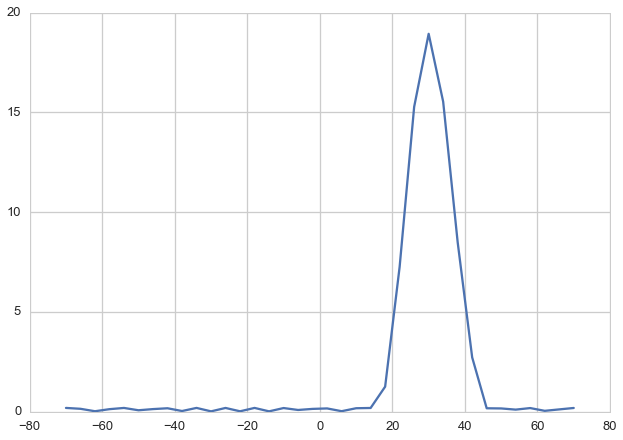

In [24]:
C.plot()

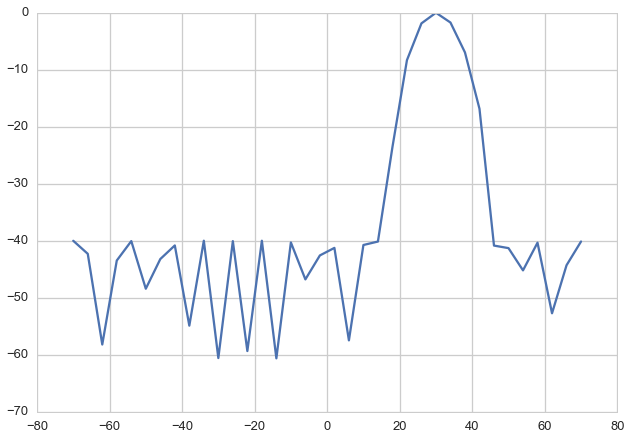

In [25]:
C.logplot()

In [26]:
NPA = PhasedArray(128, 18, 75)

In [27]:
NC = NarrowCFDNmy(NPA, S, 14)

/usr/lib/python3.4/site-packages/scipy/signal/windows.py:1207: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


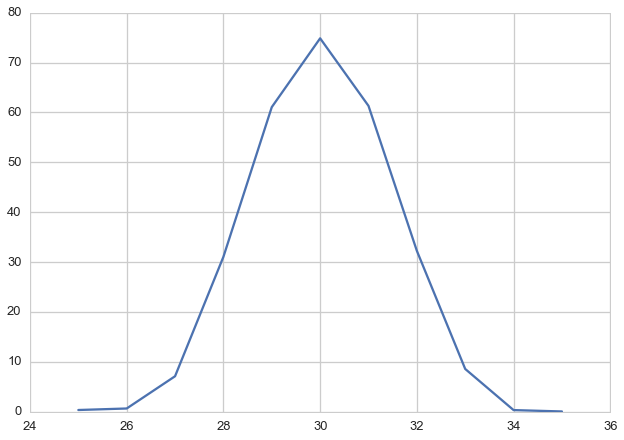

In [28]:
NC.plot()

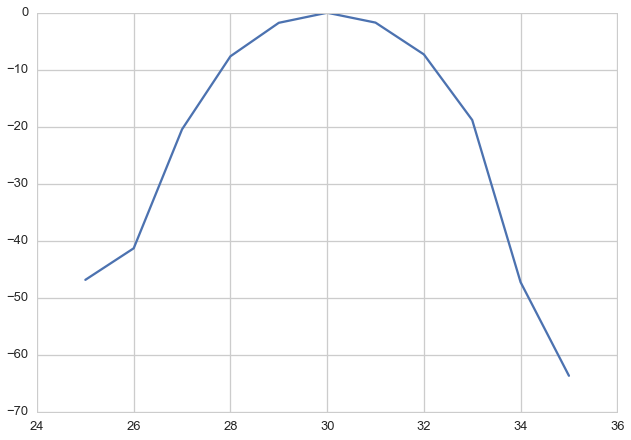

In [29]:
NC.logplot()

In [30]:
S = Signal(PA, 28*np.pi/180)+Signal(PA, 32*np.pi/180)

In [31]:
C = CFDN(PA, S, 25, [-60*np.pi/180, 60*np.pi/180])

/usr/lib/python3.4/site-packages/scipy/signal/windows.py:1207: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


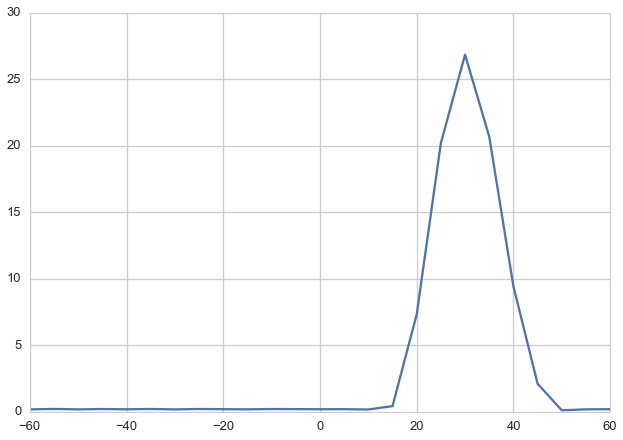

In [32]:
C.plot()

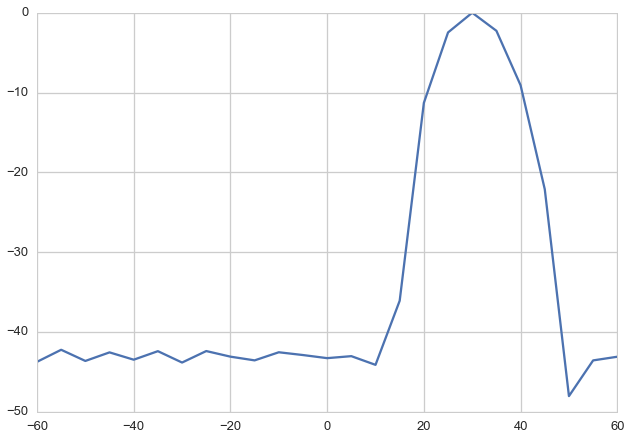

In [33]:
C.logplot()

In [34]:
NC = NarrowCFDNmy(NPA, S, 18)

/usr/lib/python3.4/site-packages/scipy/signal/windows.py:1207: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


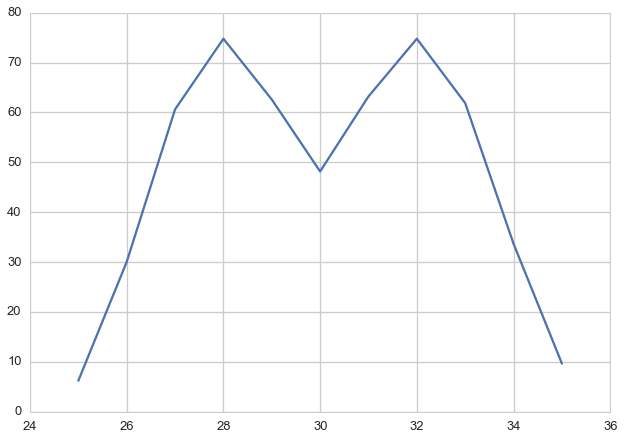

In [35]:
NC.plot()

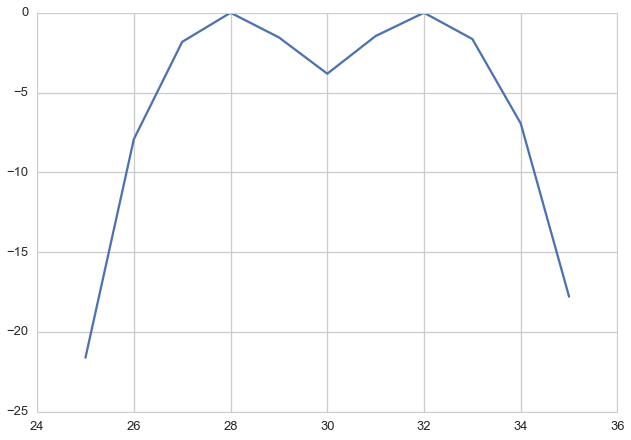

In [36]:
NC.logplot()

In [37]:
S = Signal(PA, 28*np.pi/180)+Signal(PA, 32*np.pi/180)+Noise(PA, 7)

/usr/lib/python3.4/site-packages/scipy/signal/windows.py:1207: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


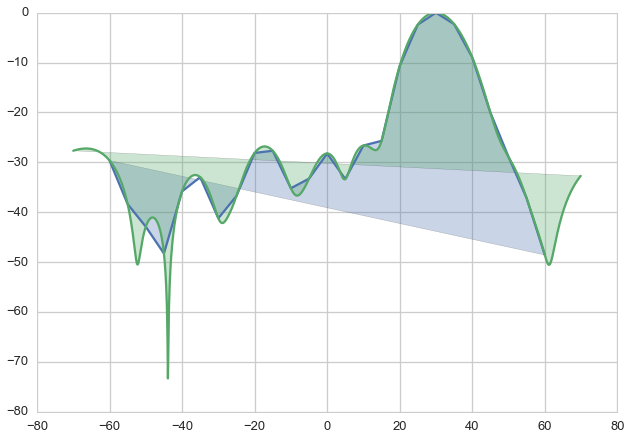

In [38]:
C = CFDN(PA, S, 25, [-60*np.pi/180, 60*np.pi/180])
C.logfill()
C.logfillacc()

/usr/lib/python3.4/site-packages/scipy/signal/windows.py:1207: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


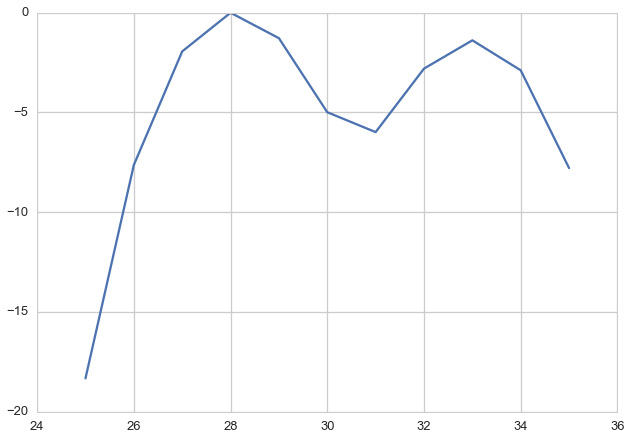

In [39]:
NC = NarrowCFDNmy(NPA, S, 17)
NC.logplot()

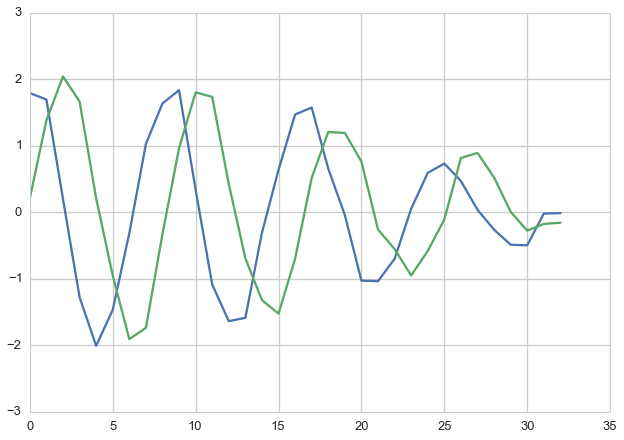

In [40]:
S.plot()

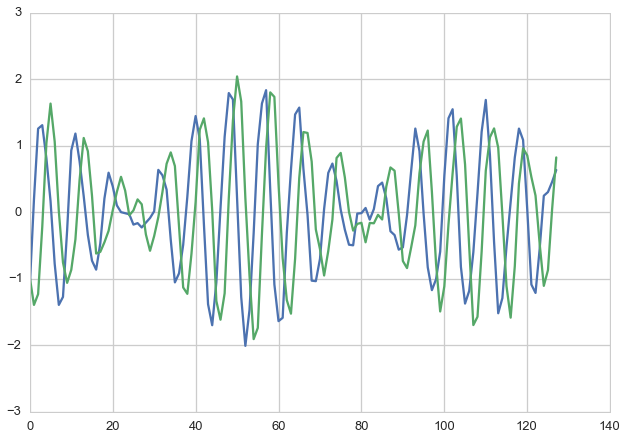

In [41]:
NC.Sig.plot()

In [42]:
from IPython.html.widgets import interact

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [43]:
S = Signal(PA, 28*np.pi/180)+Signal(PA, 32*np.pi/180)+Noise(PA,3)

In [44]:
def research(P):    
    C = CFDN(PA, S, 25, [-60*np.pi/180, 60*np.pi/180])
    plt.subplot(121)
    C.logplot()
    NC = NarrowCFDNmy(NPA, S, P)
    plt.subplot(122)
    NC.logplot()

/usr/lib/python3.4/site-packages/scipy/signal/windows.py:1207: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


<function __main__.research>

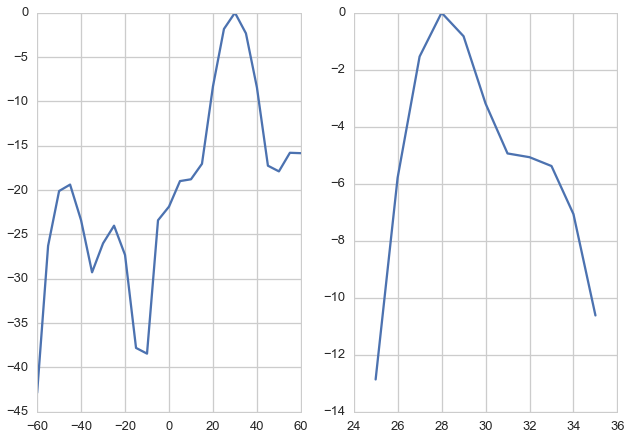

In [45]:
interact(research, P=(2,30))

In [46]:
def research2(P):
    NC = NarrowCFDNmy(NPA, S, P)
    NC.logplot()

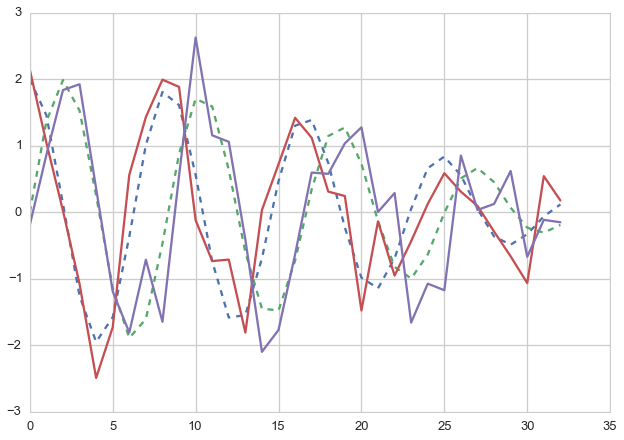

In [47]:
S = Signal(PA, 28*np.pi/180)+Signal(PA, 32*np.pi/180)
S.plot('--')
S = Signal(PA, 28*np.pi/180)+Signal(PA, 32*np.pi/180)+Noise(PA, 2)
S.plot()

In [48]:
lengths = [[ 1, 2, 3, 4, 5, 6],
           [ 7, 8, 9,10,11,12],
           [13,14,15,16,17,18],
           [19,20,21,22,23,24],
           [25,26,27,28,29,30]]           

In [49]:
from itertools import chain

/usr/lib/python3.4/site-packages/scipy/signal/windows.py:1207: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


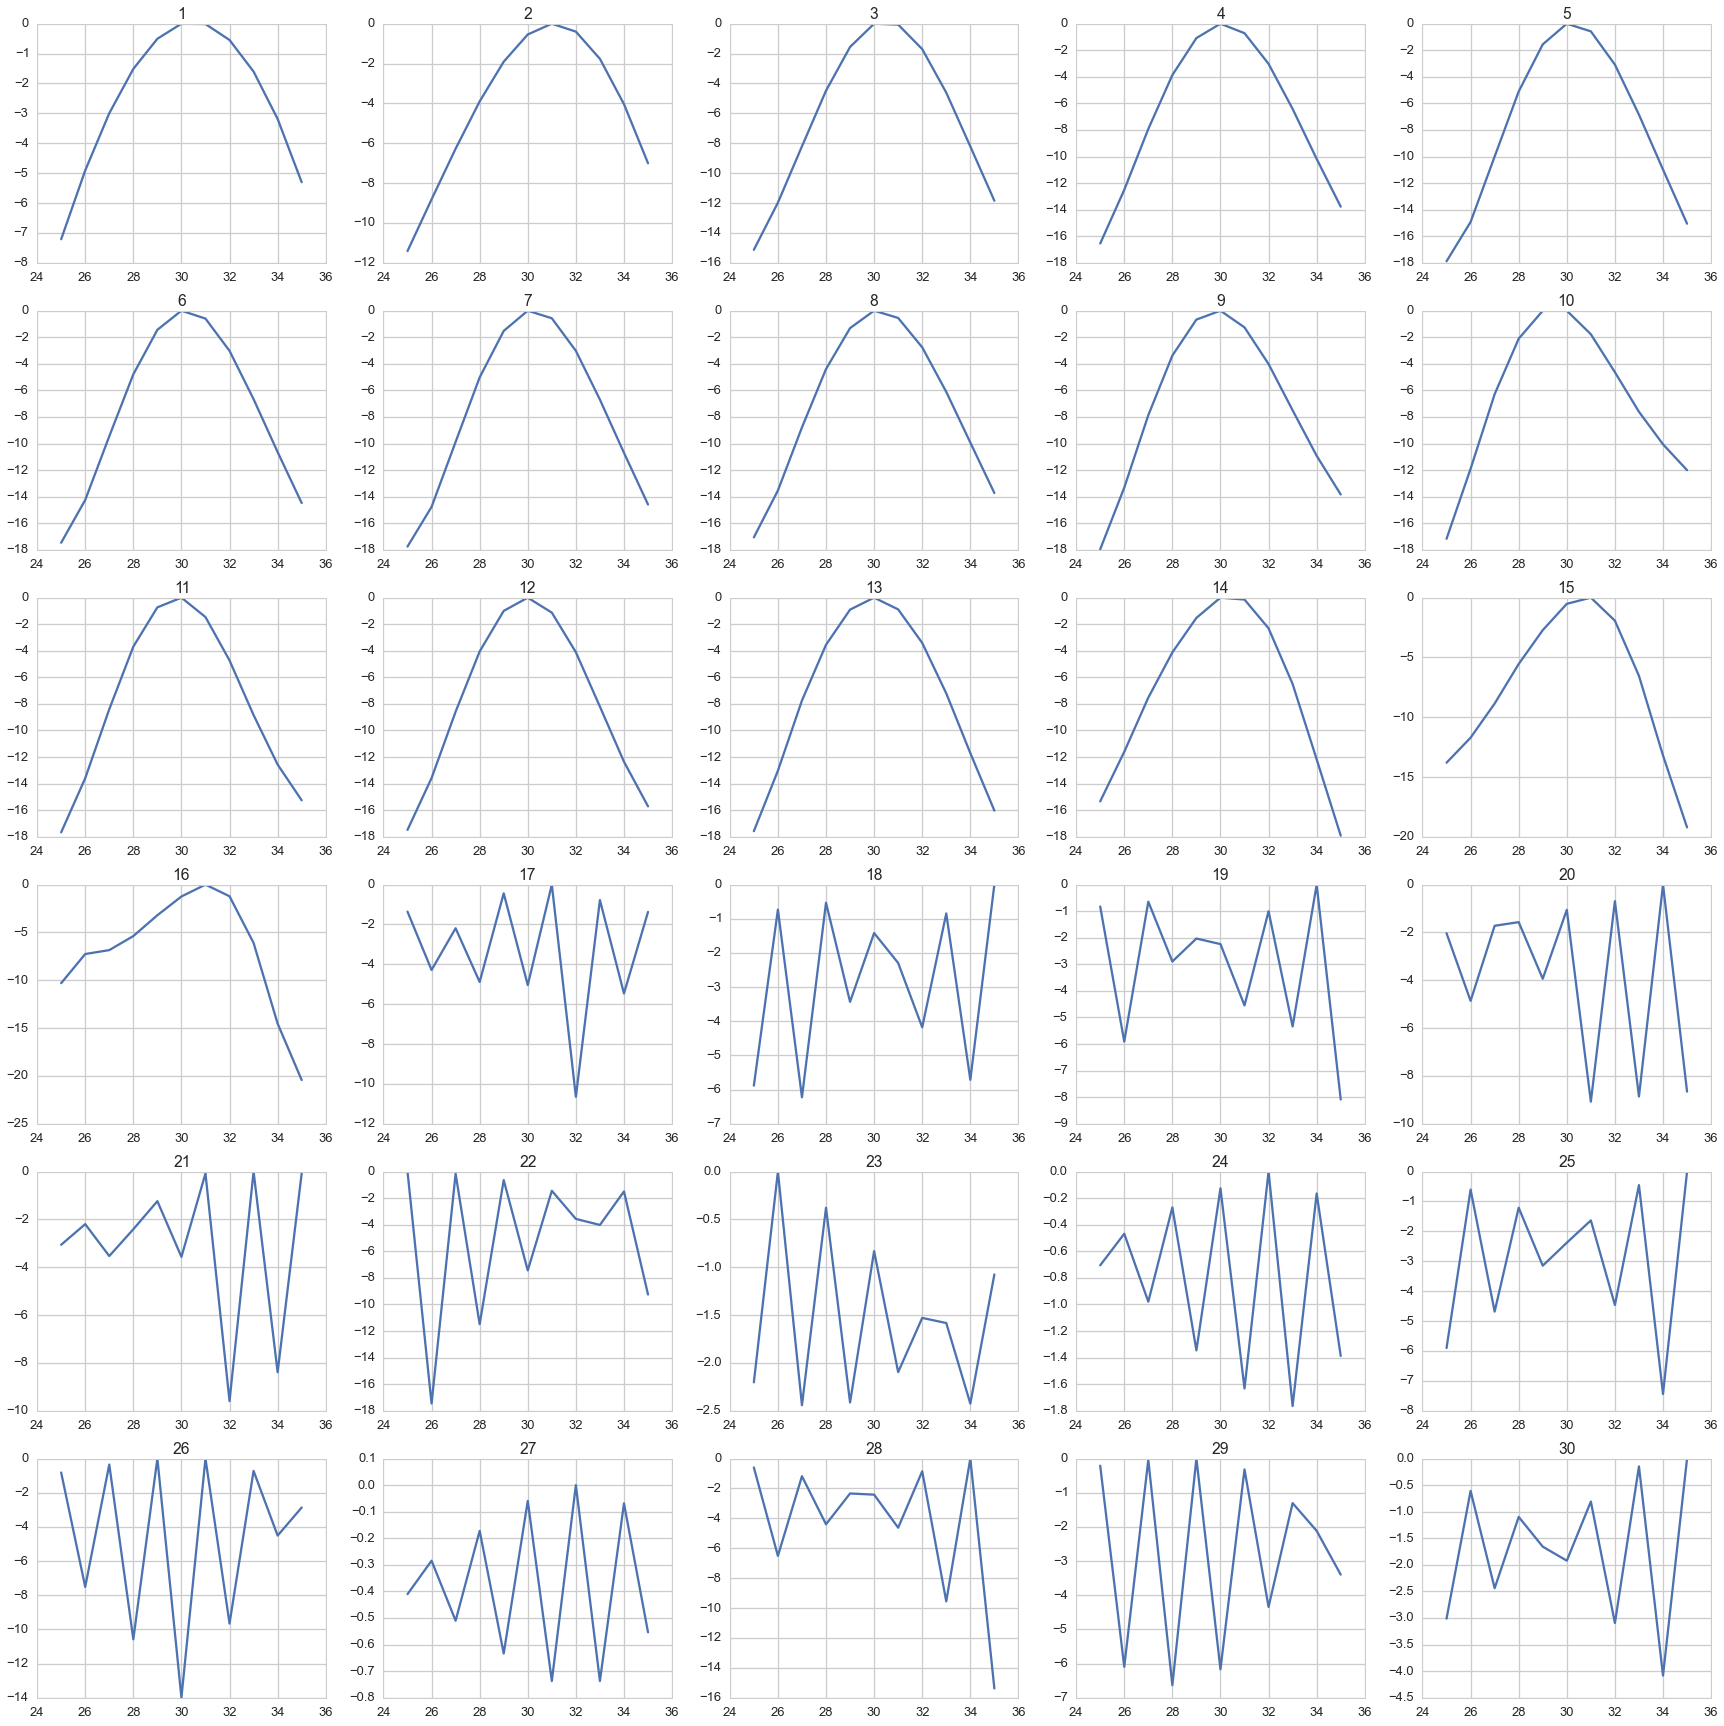

In [41]:
plt.figure(figsize=(30,30))
for i,P in enumerate(chain.from_iterable(zip(*zip(*lengths)))):
    plt.subplot(len(lengths[0]),len(lengths),i+1)
    plt.title(str(P))
    research2(P)    

/usr/lib/python3.4/site-packages/scipy/signal/windows.py:1207: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


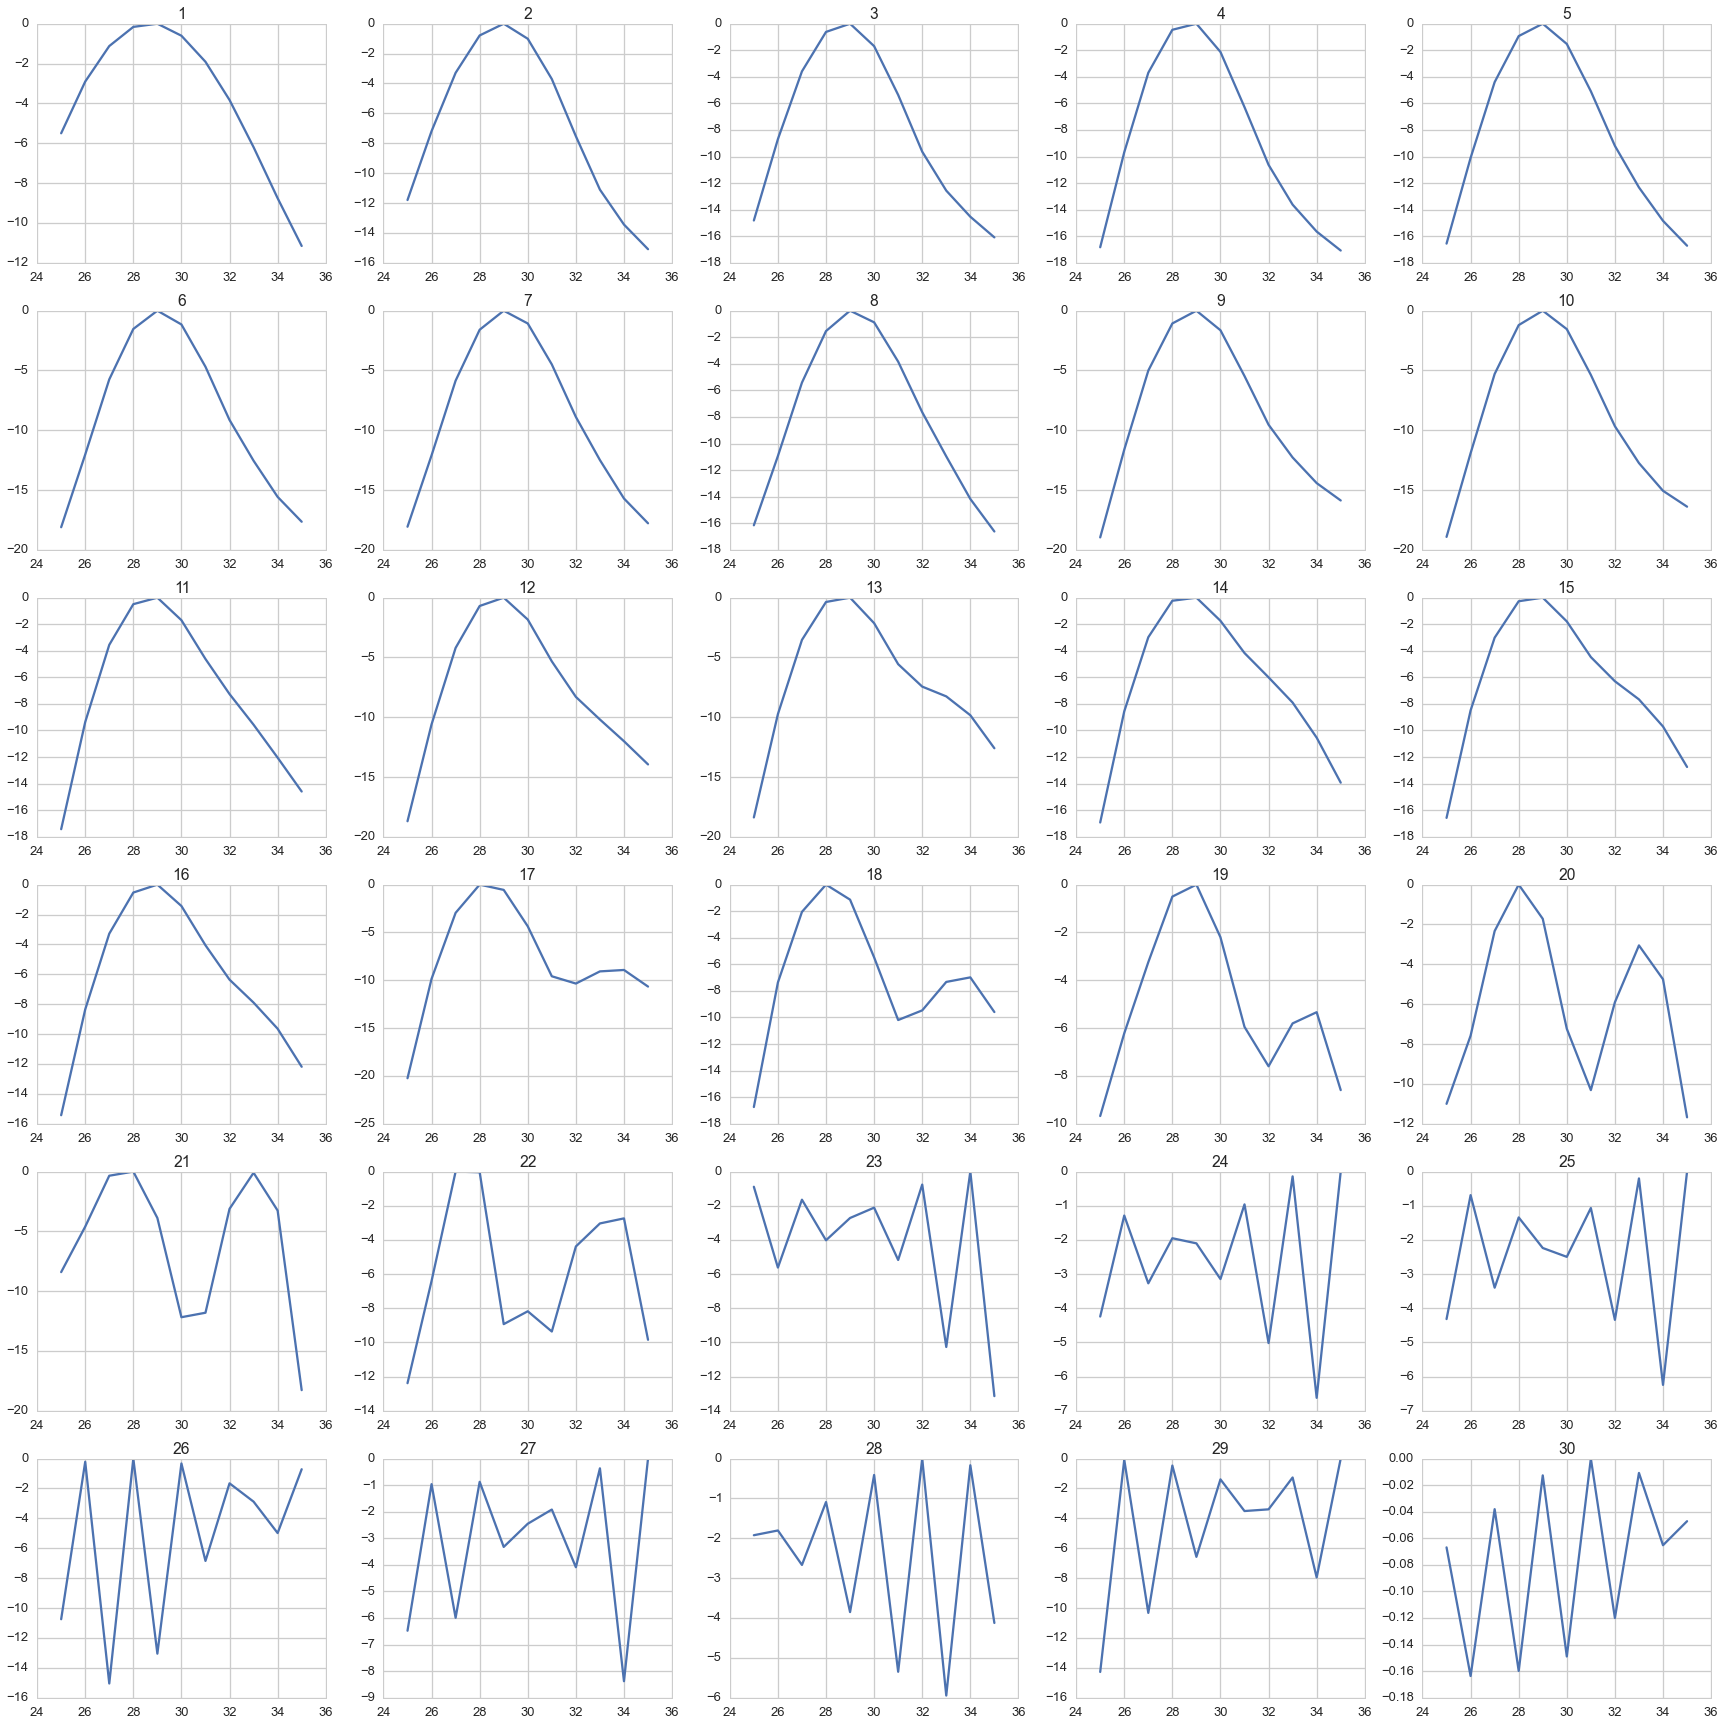

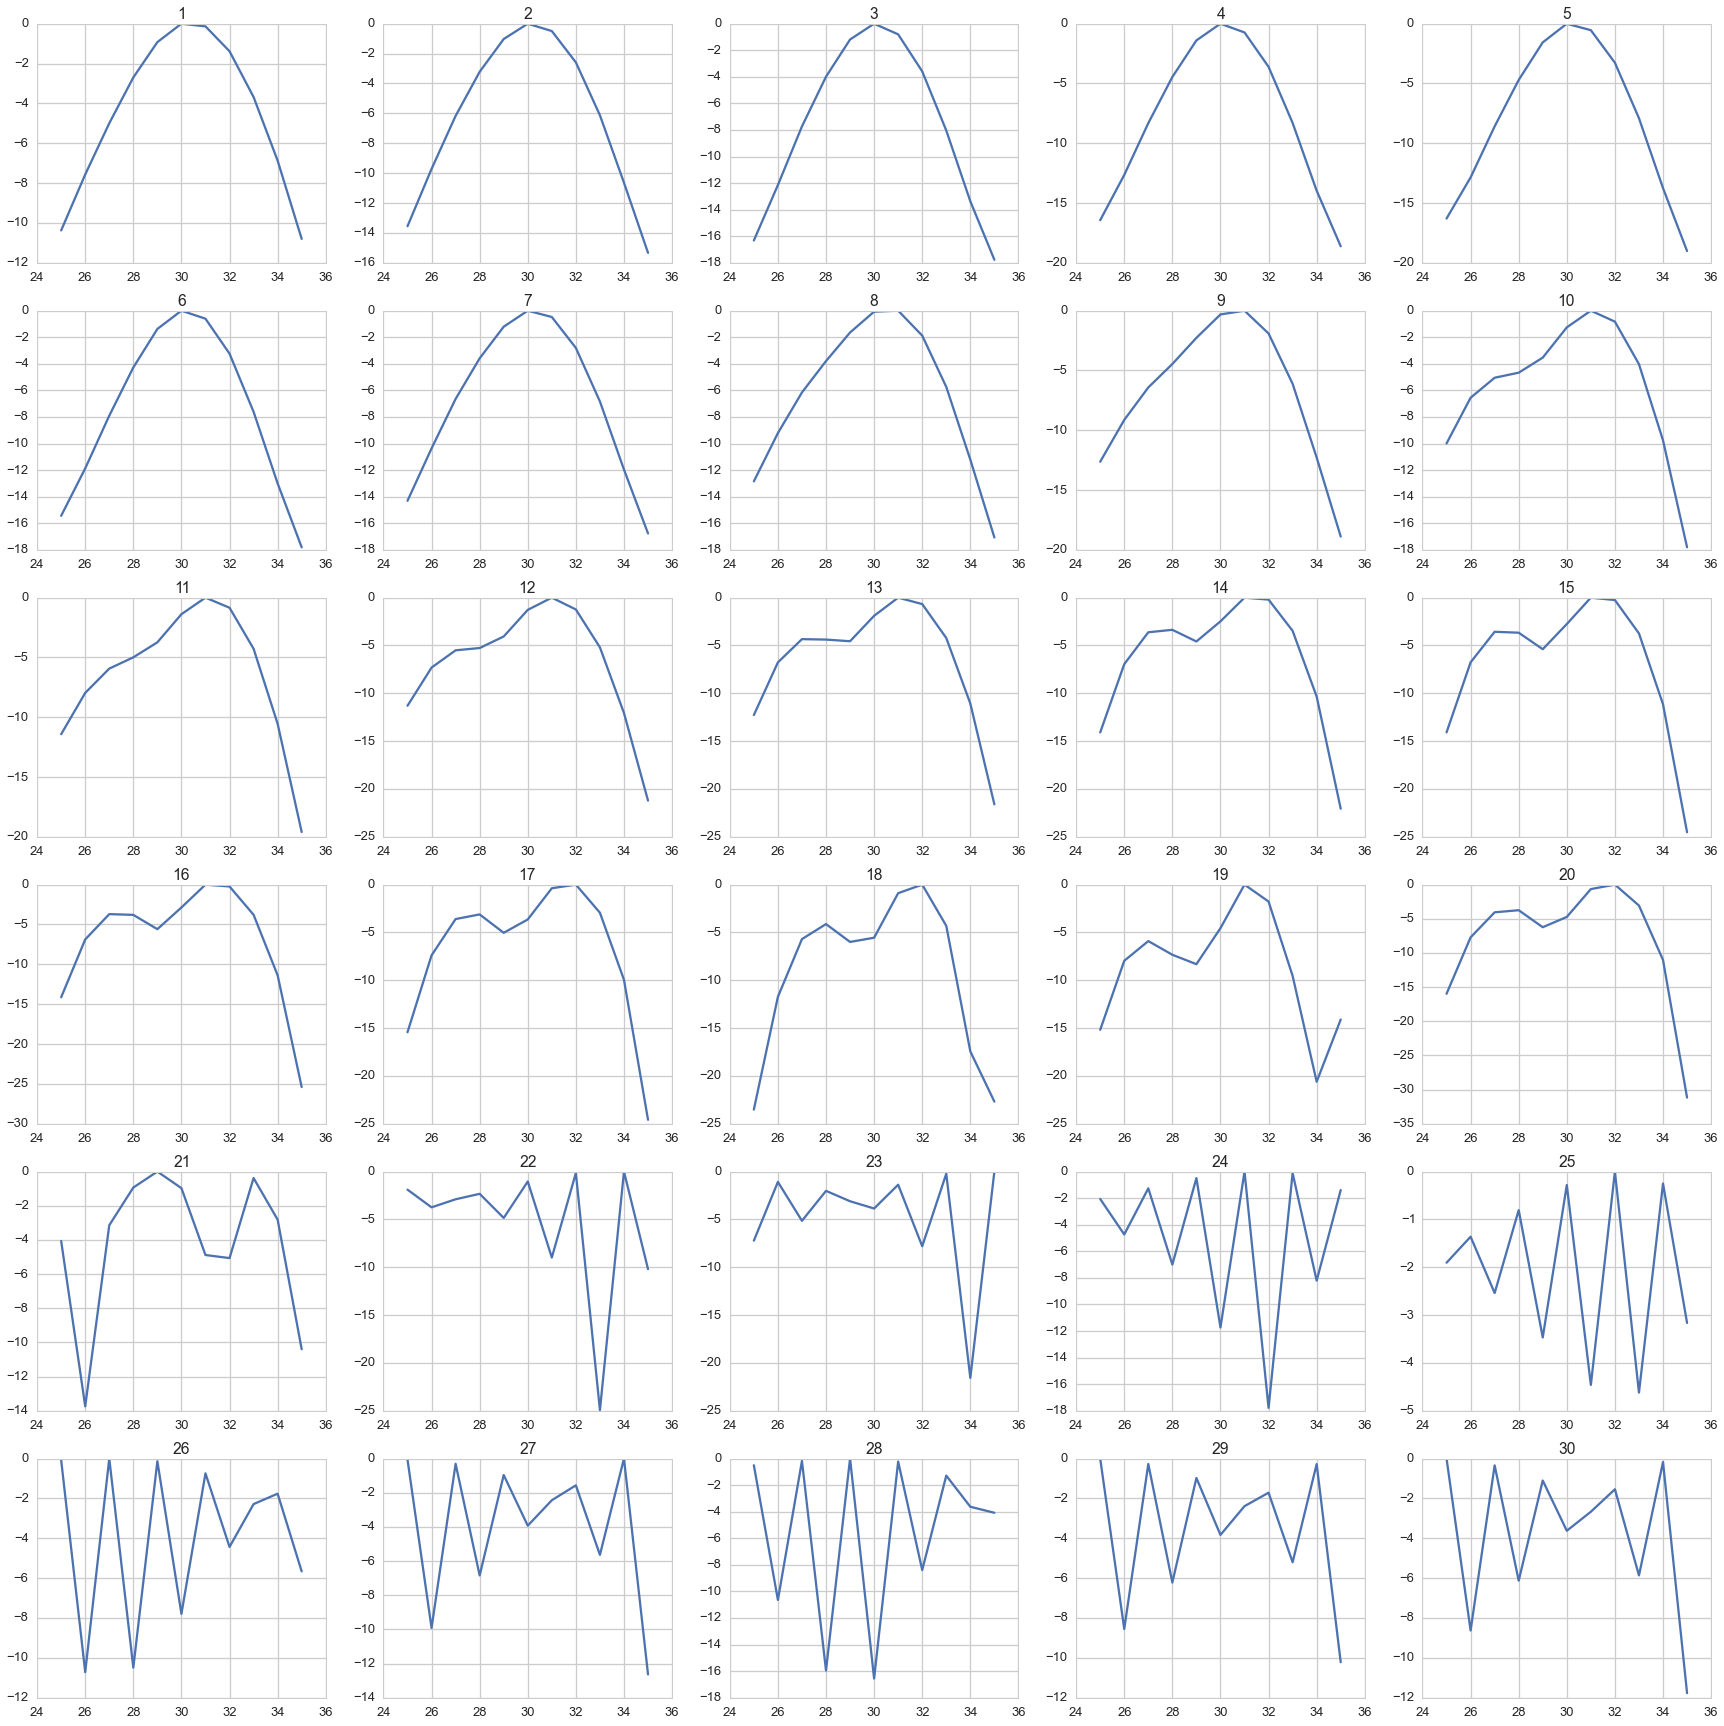

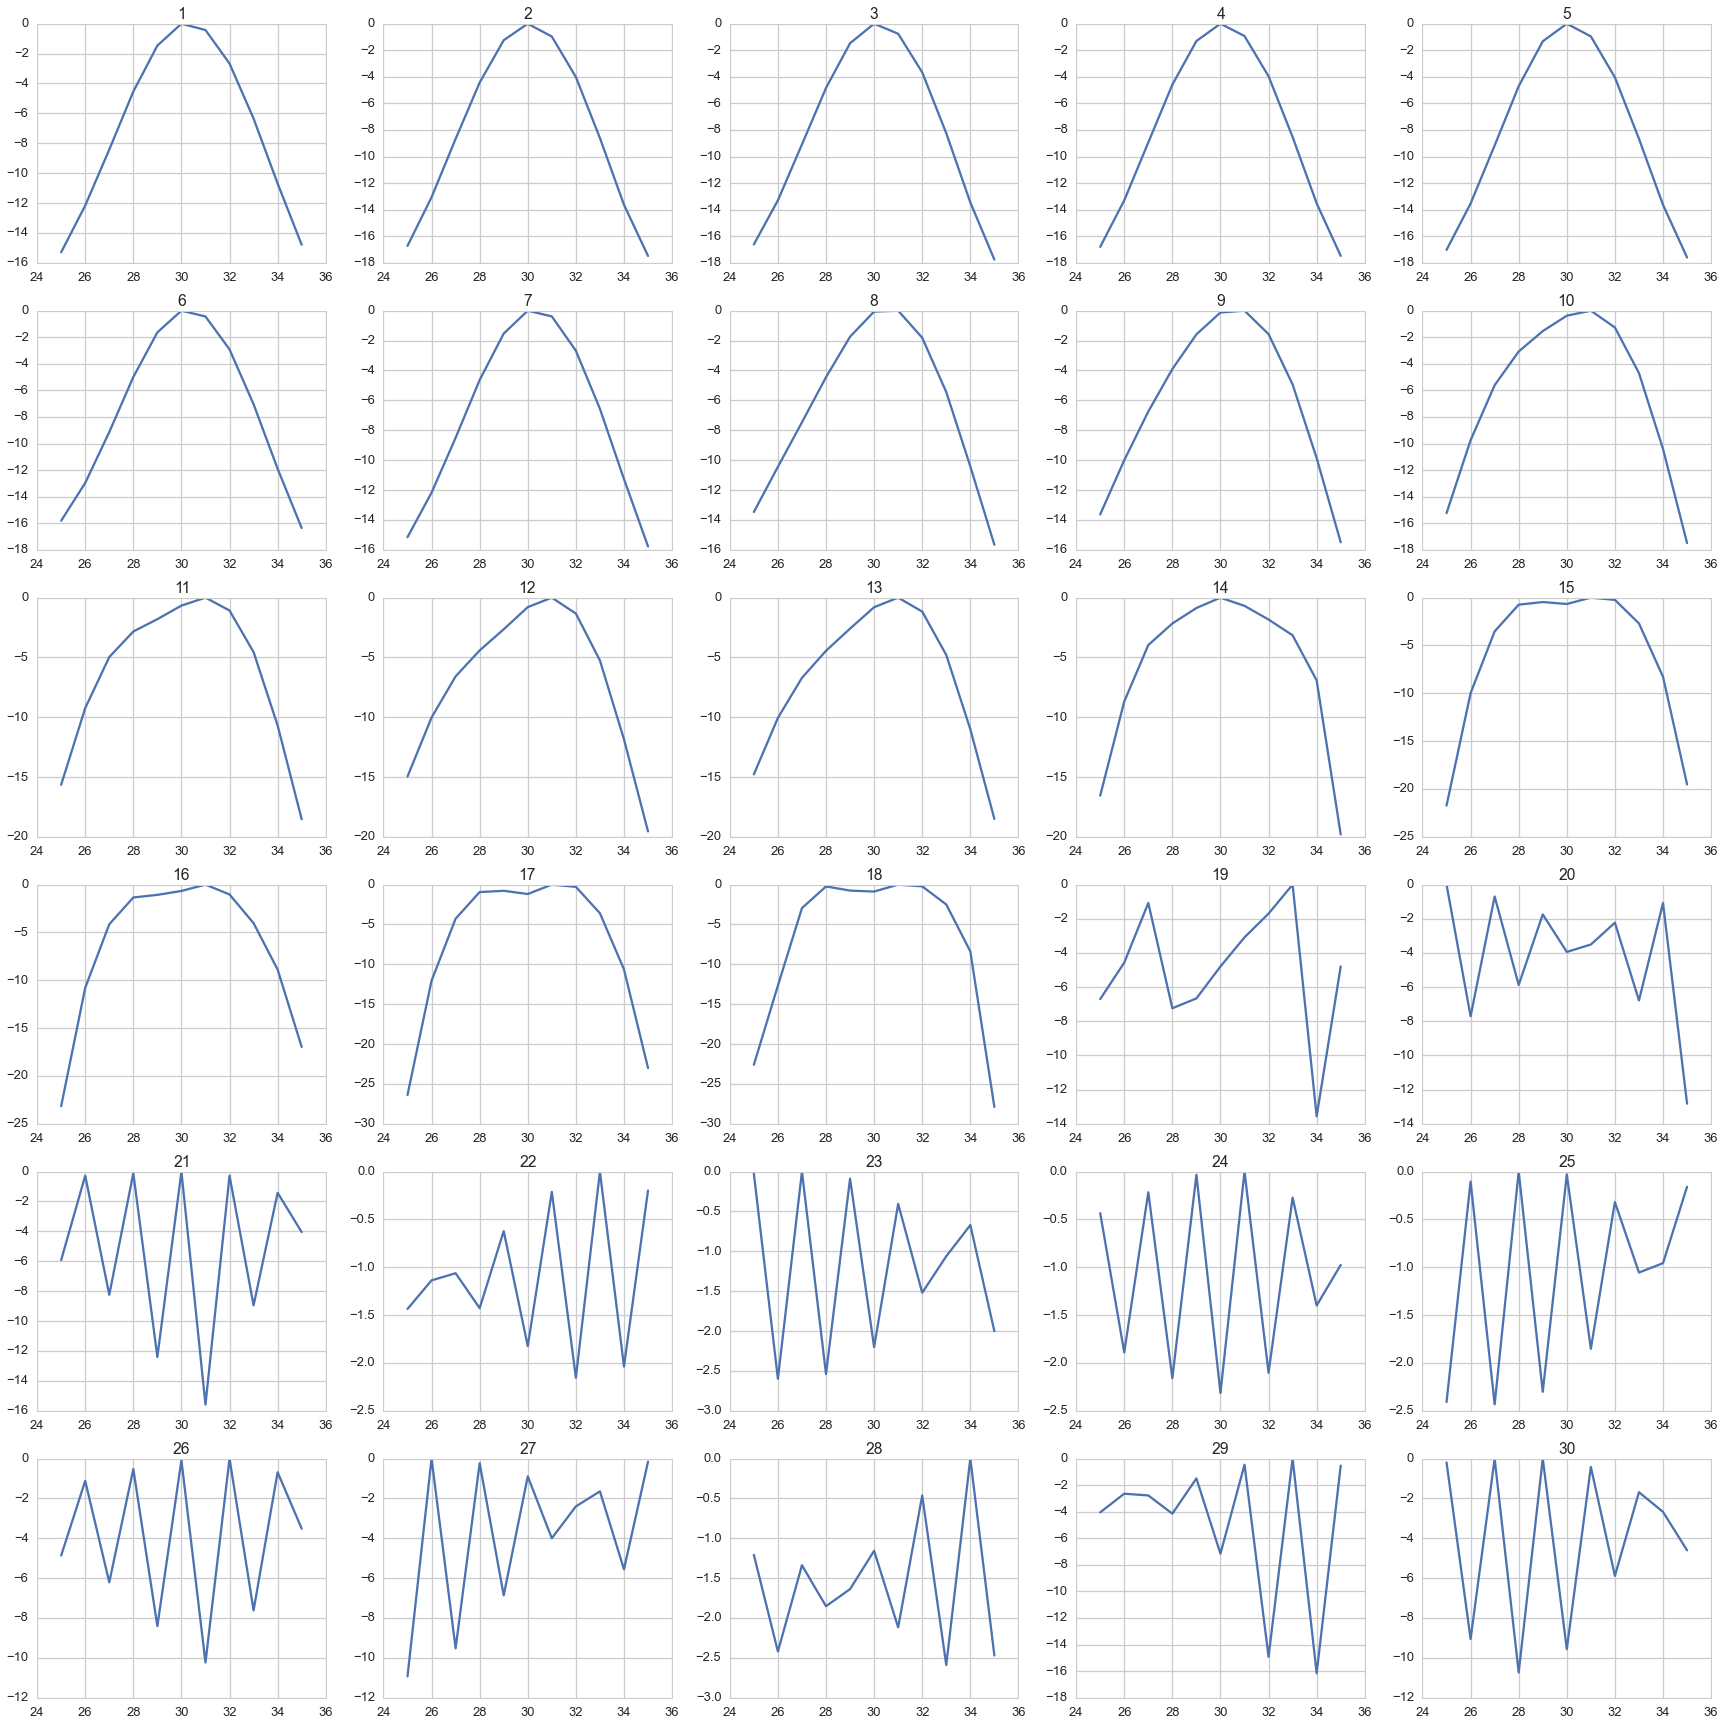

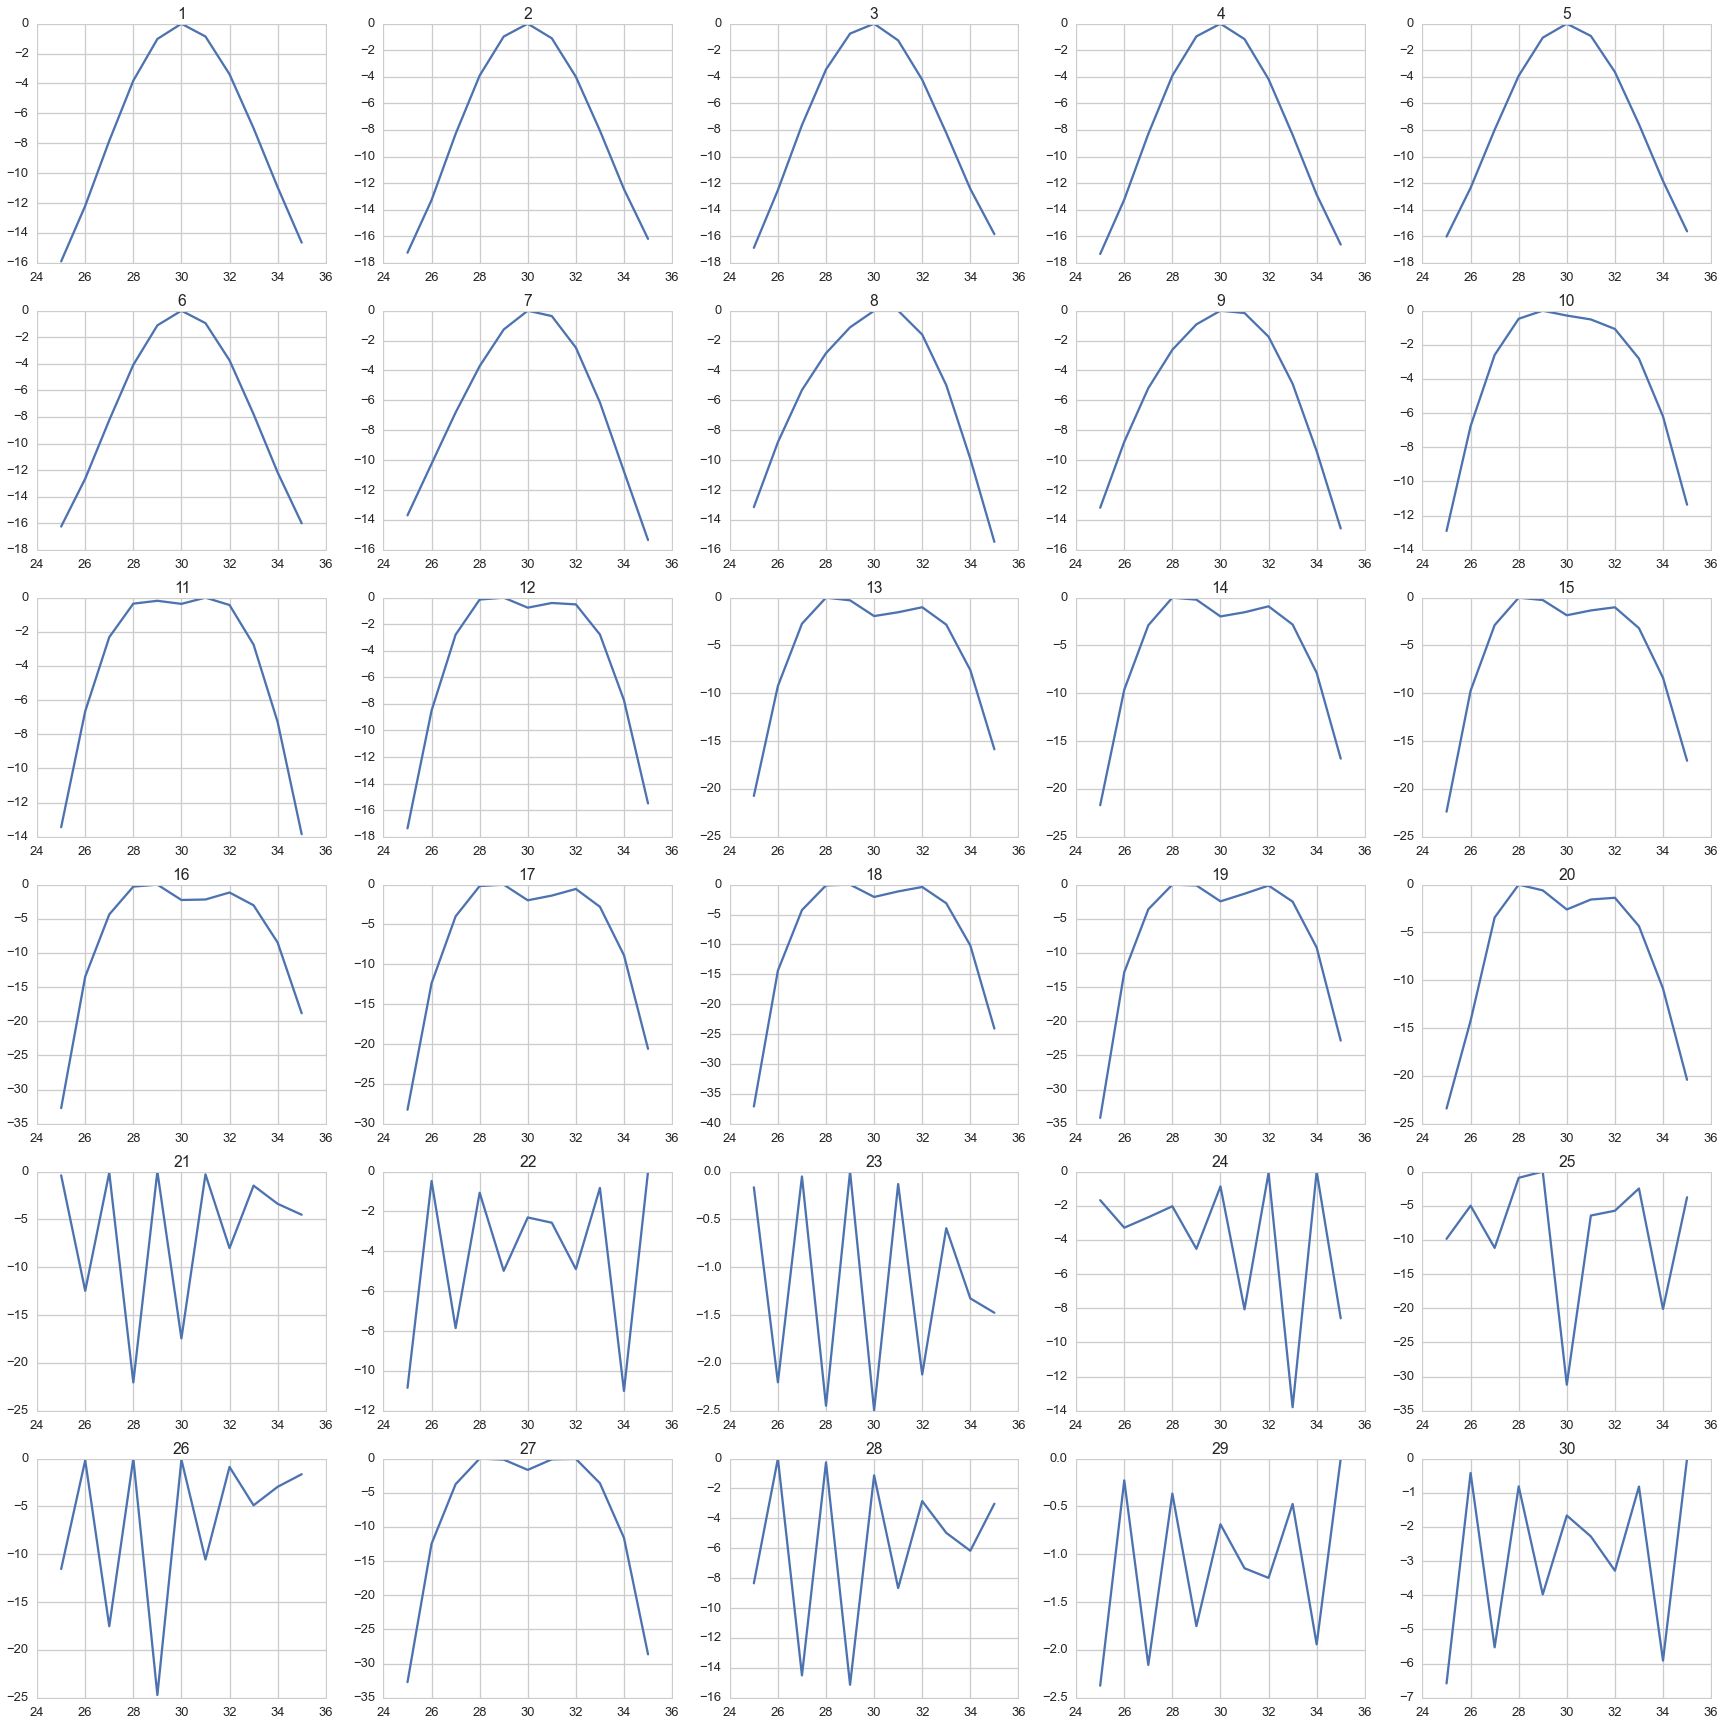

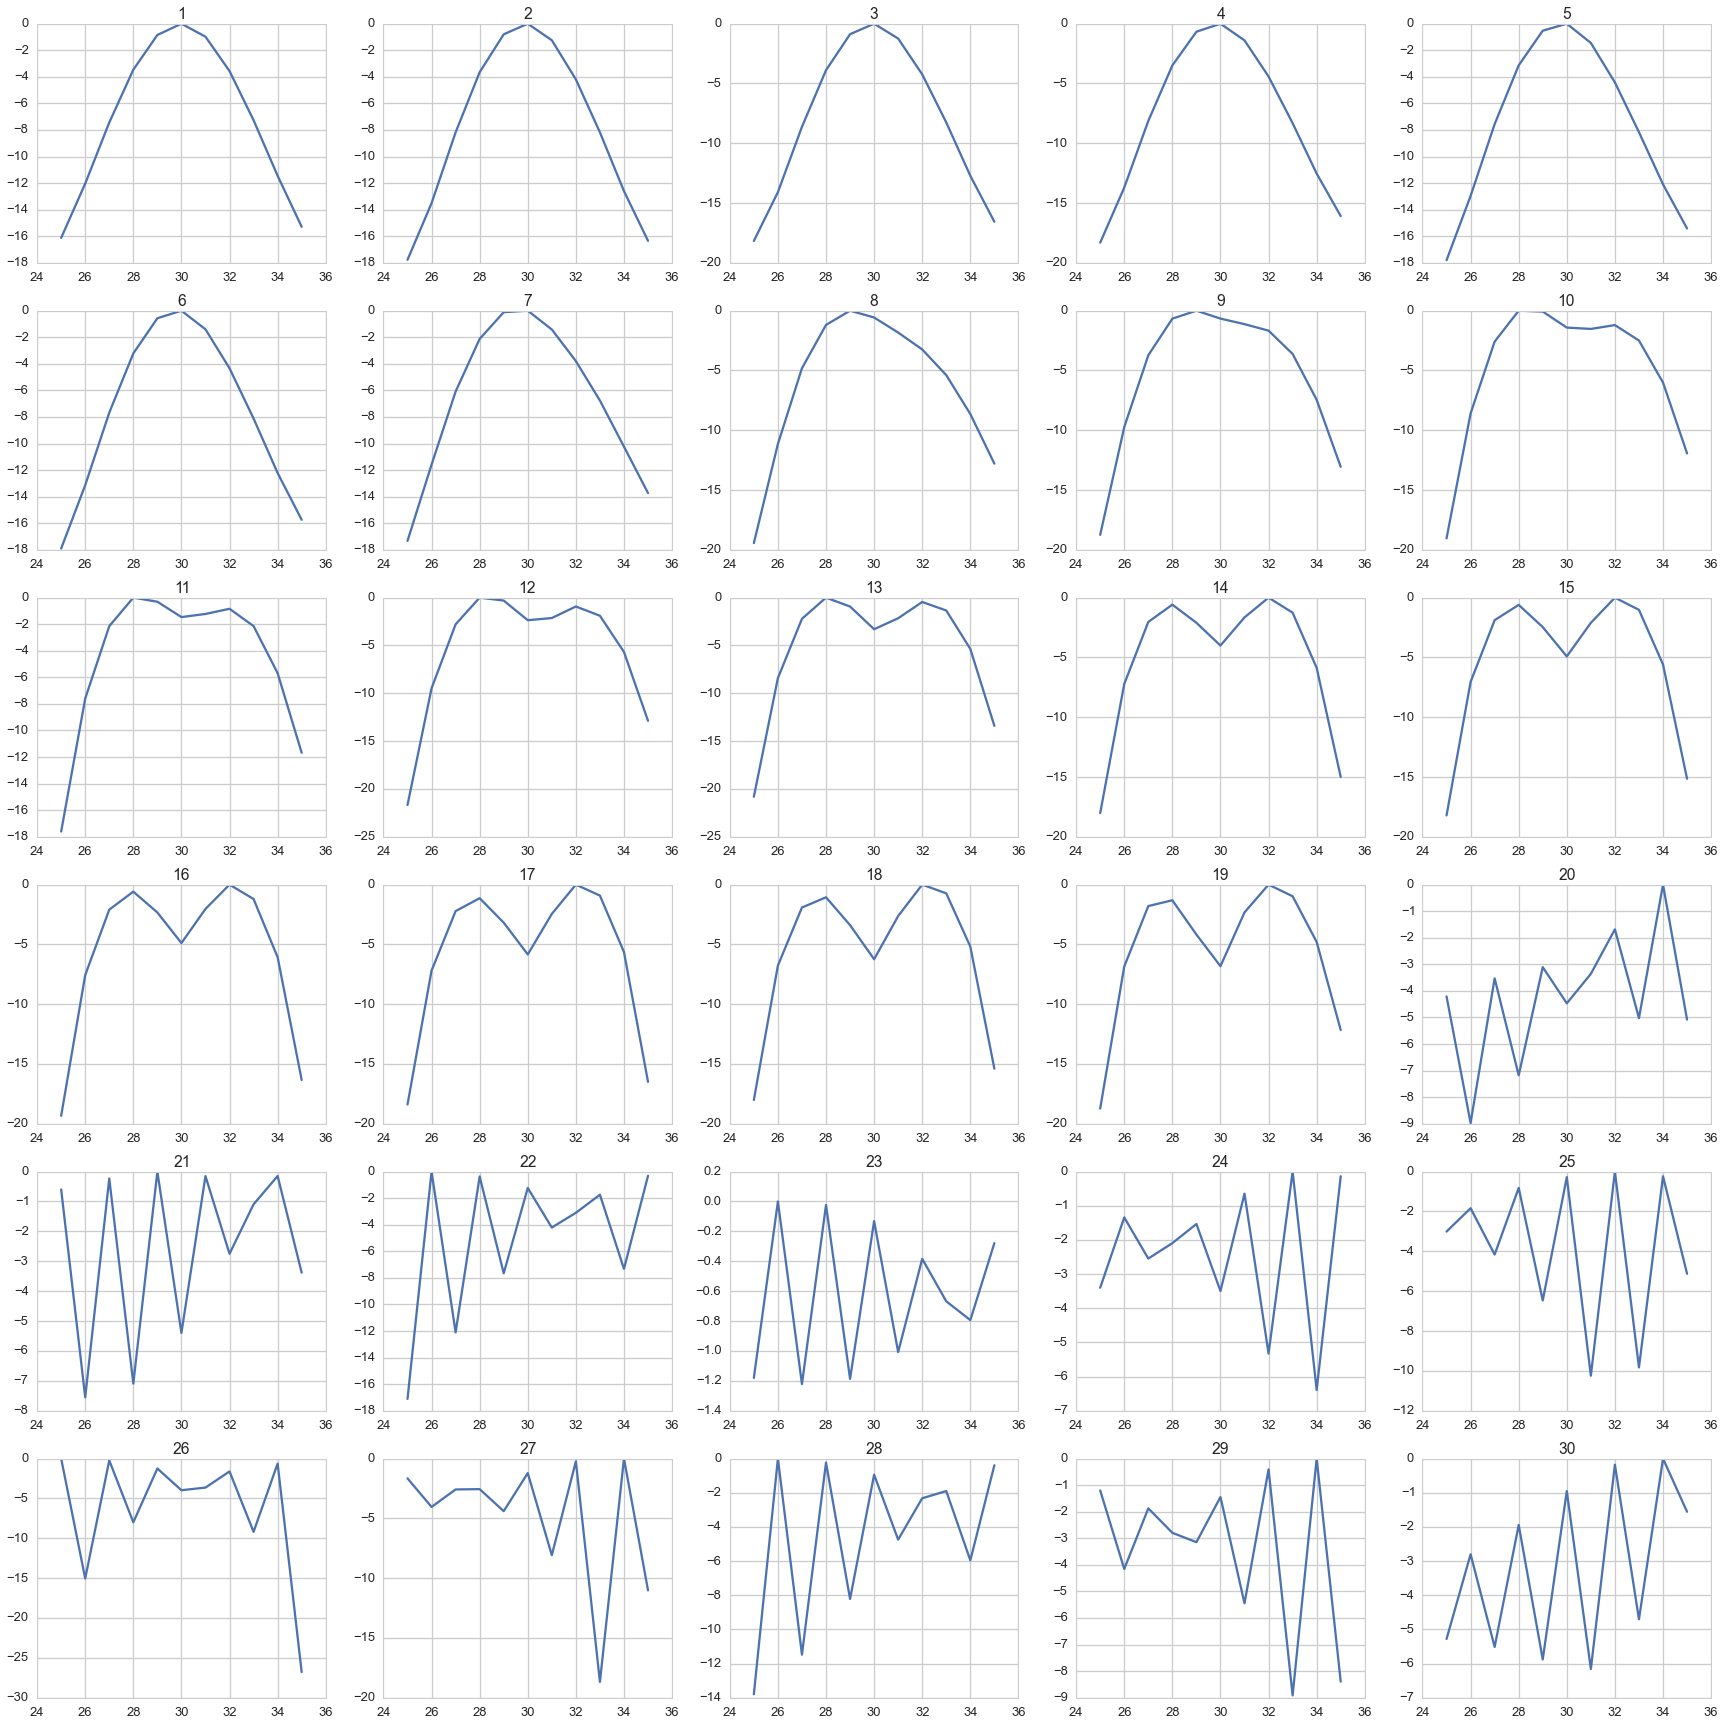

In [42]:
for noiselevel in [2,4,6,8,10]:
    S = Signal(PA, 28*np.pi/180)+Signal(PA, 32*np.pi/180)+Noise(PA, noiselevel)
    plt.figure(figsize=(30,30))
    for i,P in enumerate(chain.from_iterable(zip(*zip(*lengths)))):
        plt.subplot(len(lengths[0]),len(lengths),i+1)
        plt.title(str(P))
        research2(P)    

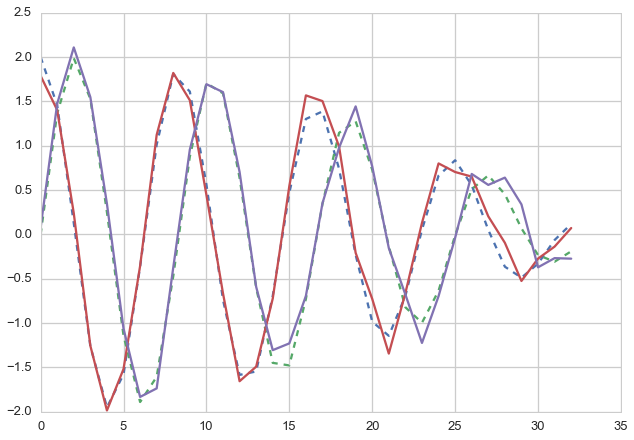

In [43]:
(Signal(PA, 28*np.pi/180)+Signal(PA, 32*np.pi/180)).plot('--')
(Signal(PA, 28*np.pi/180)+Signal(PA, 32*np.pi/180) + Noise(PA,8)).plot()

/usr/lib/python3.4/site-packages/scipy/signal/windows.py:1207: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


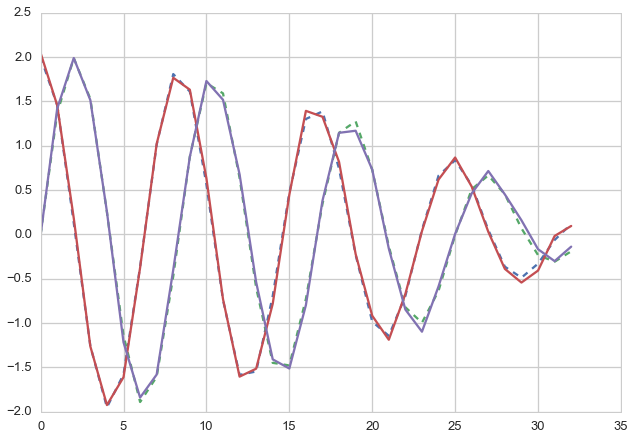

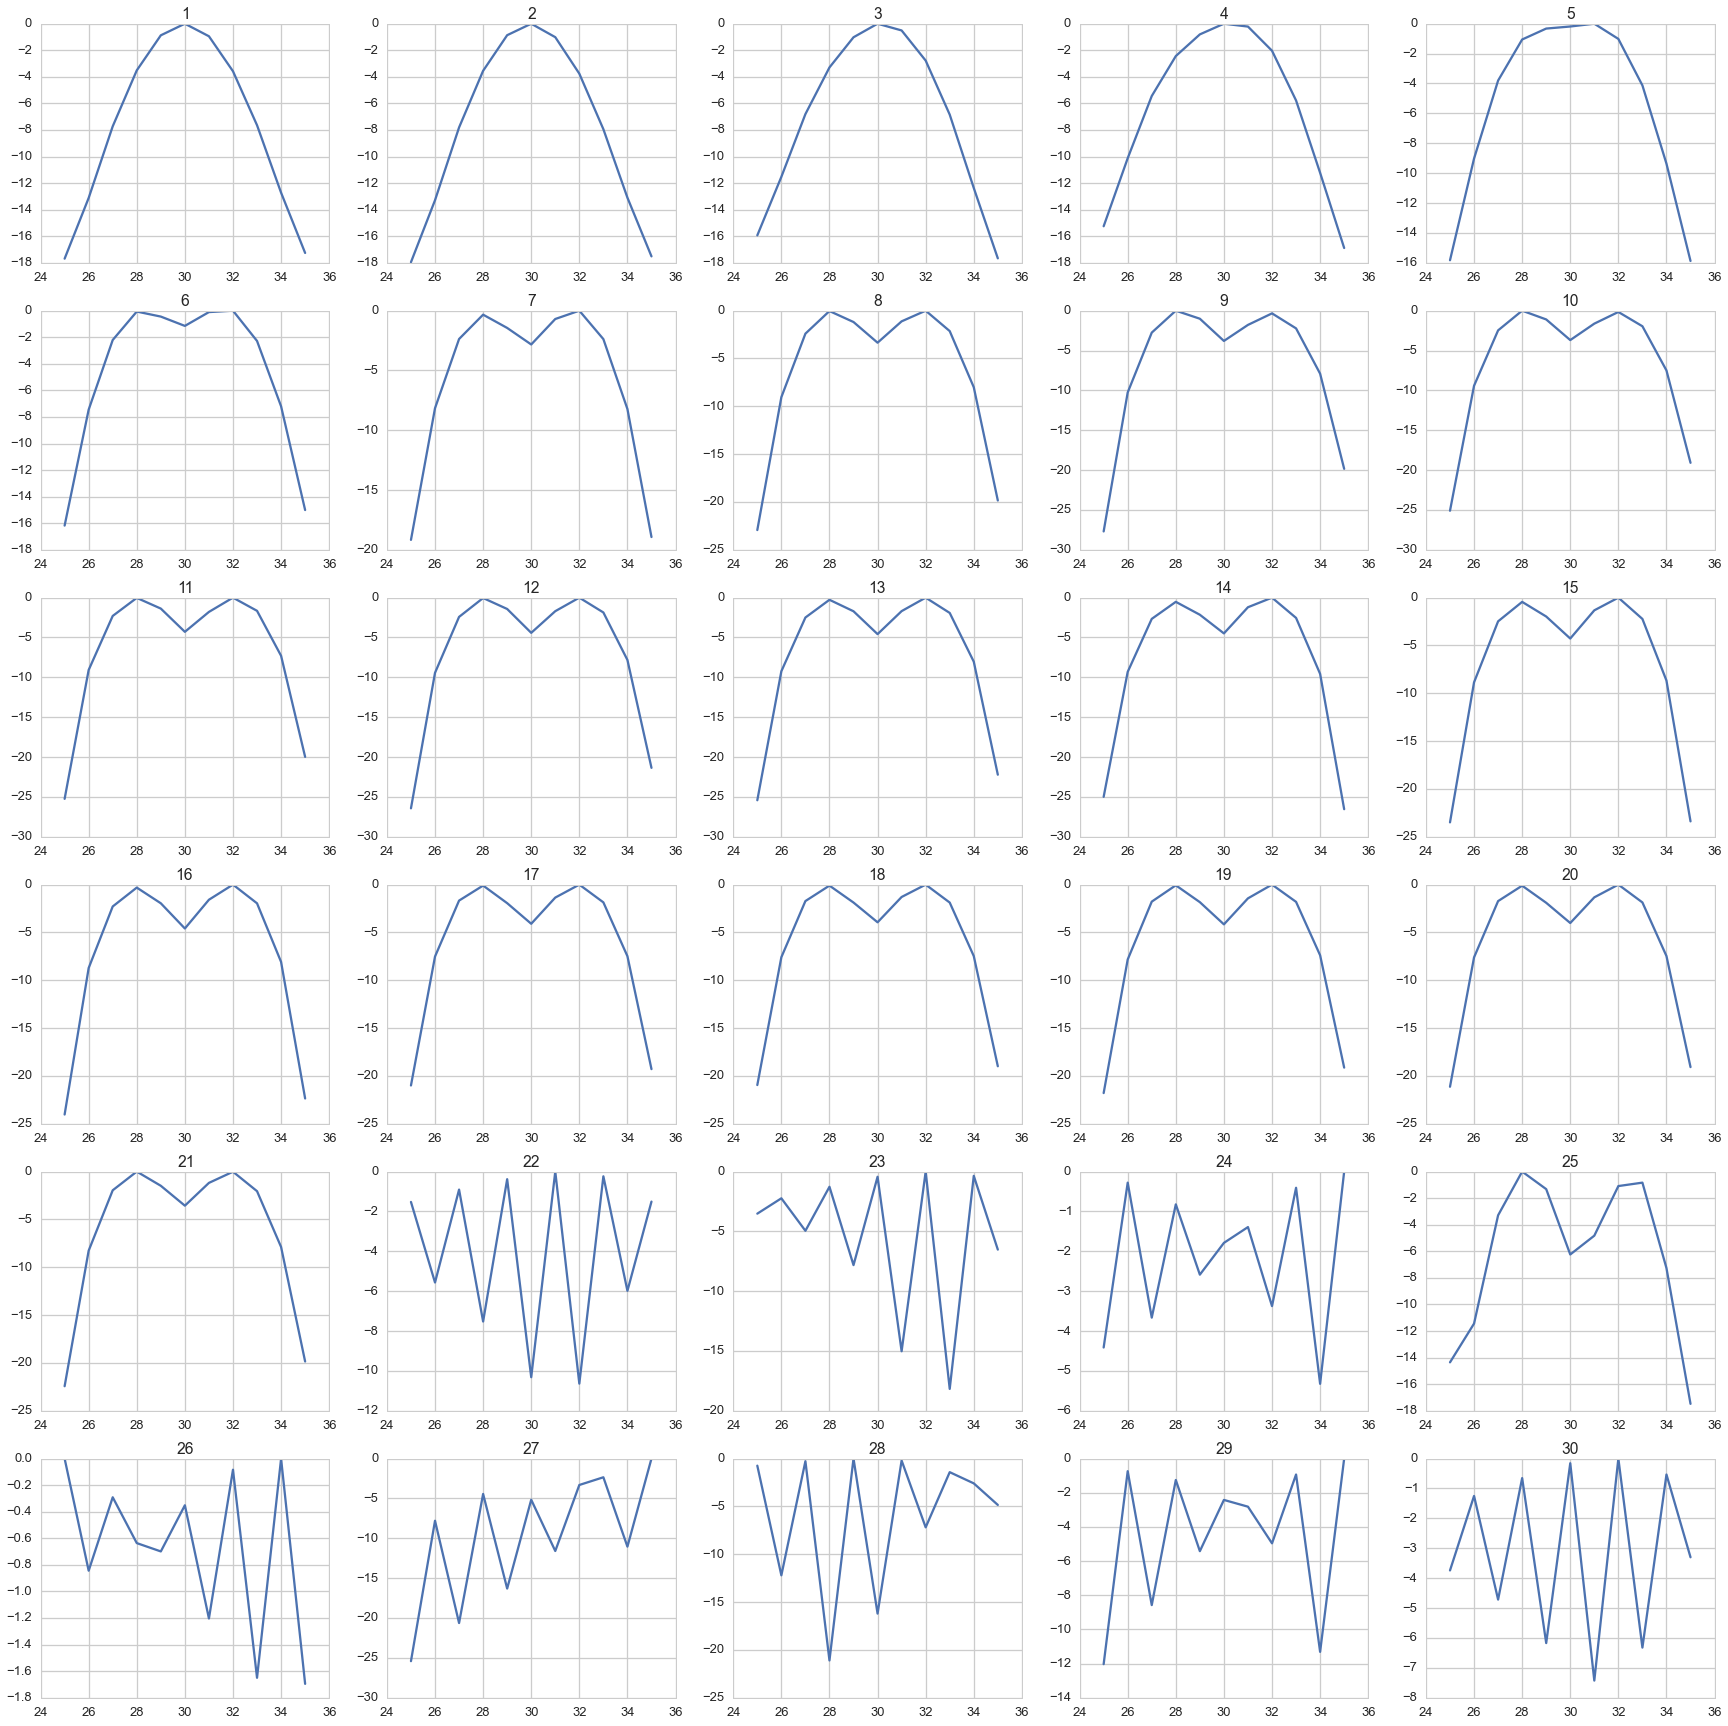

In [44]:
Su = Signal(PA, 28*np.pi/180)+Signal(PA, 32*np.pi/180)
S = Signal(PA, 28*np.pi/180)+Signal(PA, 32*np.pi/180)+Noise(PA, 20.0)
plt.figure()
Su.plot('--')
S.plot()
plt.figure(figsize=(30,30))
for i,P in enumerate(chain.from_iterable(zip(*zip(*lengths)))):
    plt.subplot(len(lengths[0]),len(lengths),i+1)
    plt.title(str(P))
    research2(P)    

/usr/lib/python3.4/site-packages/scipy/signal/windows.py:1207: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


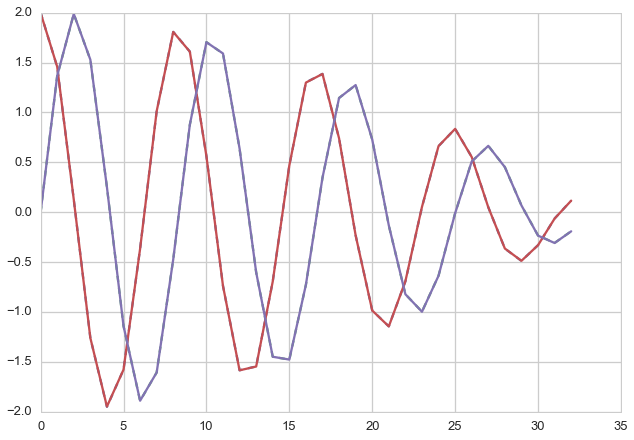

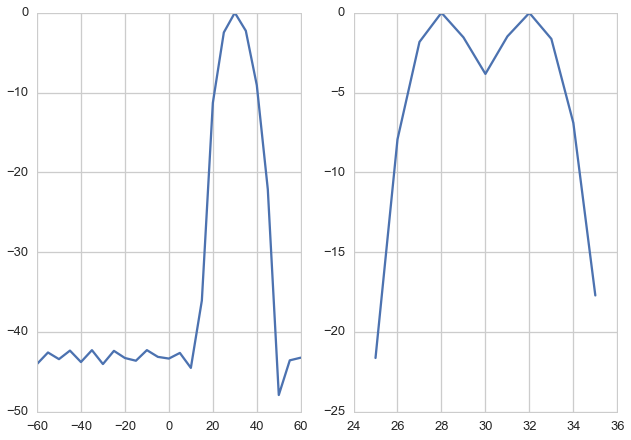

In [45]:
Su = Signal(PA, 28*np.pi/180)+Signal(PA, 32*np.pi/180)
S = Signal(PA, 28*np.pi/180)+Signal(PA, 32*np.pi/180)+Noise(PA, 1000.0)
plt.figure()
Su.plot('--')
S.plot()
plt.figure()
research(13)    

In [50]:
np.linspace(-60, 60, 25)

array([-60., -55., -50., -45., -40., -35., -30., -25., -20., -15., -10.,
        -5.,   0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,
        50.,  55.,  60.])

In [51]:
def researchC():
    C = CFDN(PA, S, 25, [-60*np.pi/180, 60*np.pi/180])
    plt.subplot(311)
    C.logfillacc()
    plt.ylim([-10,0])
    plt.xlim([24,36])
    plt.title('Широкие лучи')
    ax = plt.gca()
    label = ax.set_xlabel('град.')
    ax.xaxis.set_label_coords(1.05, -0.025)
    ax = plt.gca()
    label = ax.set_ylabel('дБ',rotation='horizontal')
    ax.yaxis.set_label_coords(-0.025,1.05)

In [52]:
def researchmyC(P):    
    NC = NarrowCFDNmy(NPA, S, P)
    plt.subplot(312)
    NC.logfillacc()
    plt.ylim([-10,0])
    plt.title('Узкие лучи')
    ax = plt.gca()
    label = ax.set_xlabel('град.')
    ax.xaxis.set_label_coords(1.05, -0.025)
    ax = plt.gca()
    label = ax.set_ylabel('дБ',rotation='horizontal')
    ax.yaxis.set_label_coords(-0.025,1.05)

/usr/lib/python3.4/site-packages/scipy/signal/windows.py:1207: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


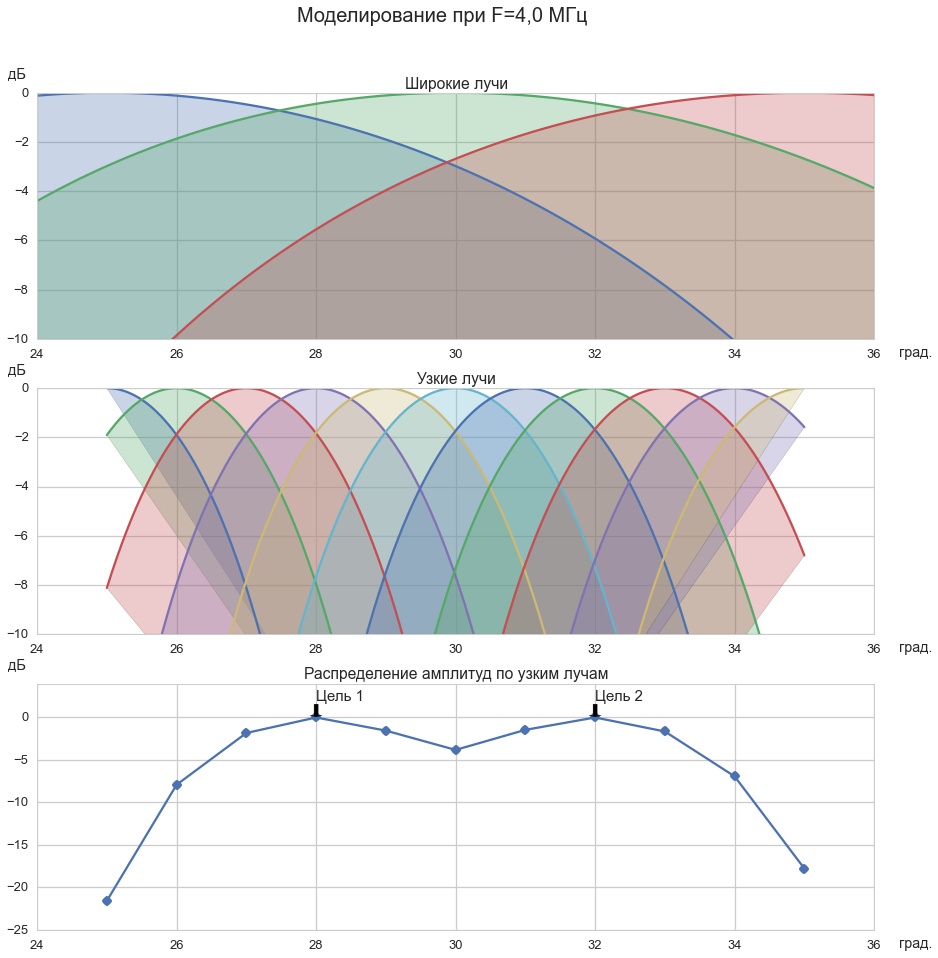

In [53]:
PA = PhasedArray(33, 18, 75.0)
NPA = PhasedArray(128, 18, 75.0)
P = 15
plt.figure(figsize=(15,15))
plt.suptitle('Моделирование при F=4,0 МГц',fontsize=20)
for theta in range(25,36,5):
    theta = theta*np.pi/180
    S = Signal(PA, theta) + Noise(PA, 10000.0)
    researchC()
for theta in range(25,36):
    theta = theta*np.pi/180
    S = Signal(PA, theta)+Noise(PA, 10000.0)
    #S = Signal(PA, 28*np.pi/180)+Signal(PA, 32*np.pi/180)+Noise(PA, 1000.0)
    researchmyC(P)
plt.ylim([-10,0])
plt.xlim([24,36])
#plt.text(27.5,2,'Сигнал 1')
S = Signal(PA, 28*np.pi/180) + Signal(PA, 32*np.pi/180) + Noise(PA, 10000.0)
NC = NarrowCFDNmy(NPA, S, P)
plt.subplot(313)
NC.logplot('-o')
plt.ylim([-25,4])
plt.title('Распределение амплитуд по узким лучам')
#plt.xlabel('град.')
ax = plt.gca()
label = ax.set_ylabel('дБ',rotation='horizontal')
ax.yaxis.set_label_coords(-0.025,1.05)
#plt.ylabel('дБ',rotation='horizontal')
ax = plt.gca()
label = ax.set_xlabel('град.')
ax.xaxis.set_label_coords(1.05, -0.025)
plt.annotate('Цель 1', xy=(28, 0), xytext=(28, 2),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=15)
plt.annotate('Цель 2', xy=(32, 0), xytext=(32, 2),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=15)
plt.savefig('Узкие лучи, f=4,0MGz')

/usr/lib/python3.4/site-packages/scipy/signal/windows.py:1207: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


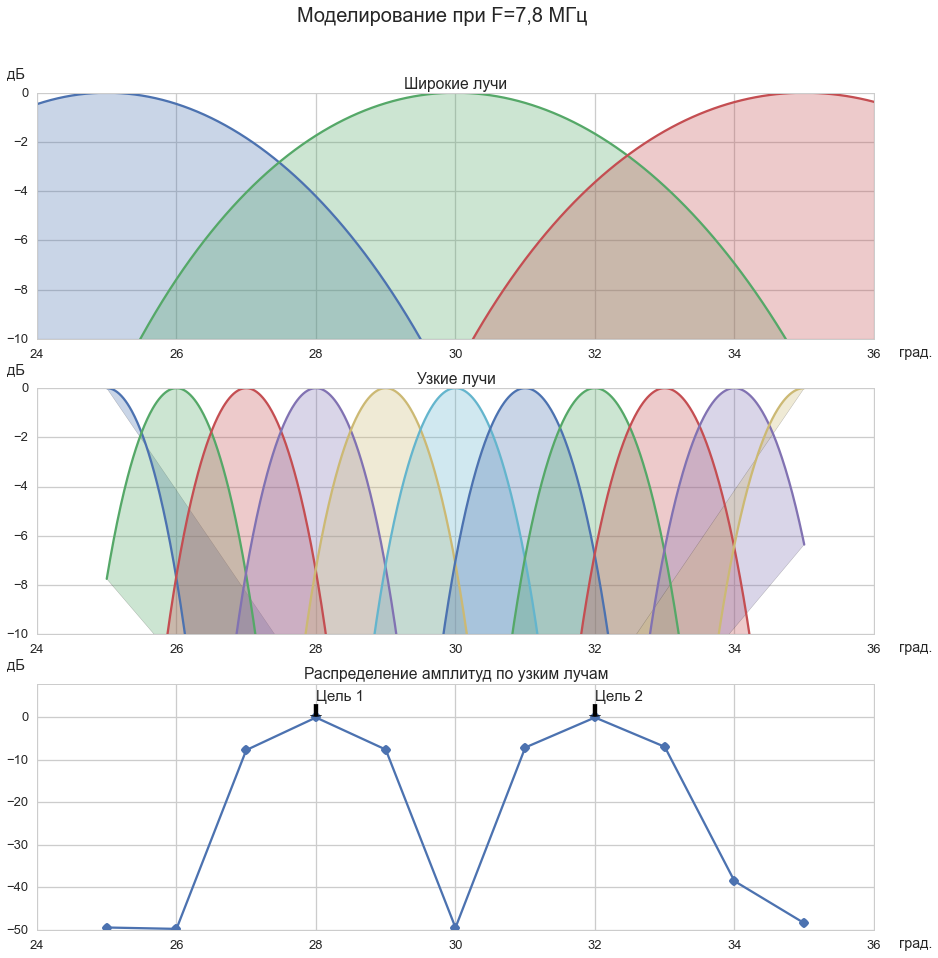

In [54]:
PA = PhasedArray(33, 18, 38.46)
NPA = PhasedArray(128, 18, 38.46)
P = 15
plt.figure(figsize=(15,15))
plt.suptitle('Моделирование при F=7,8 МГц',fontsize=20)
for theta in range(25,36,5):
    theta = theta*np.pi/180
    S = Signal(PA, theta) + Noise(PA, 10000.0)
    researchC()
for theta in range(25,36):
    theta = theta*np.pi/180
    S = Signal(PA, theta)+Noise(PA, 10000.0)
    #S = Signal(PA, 28*np.pi/180)+Signal(PA, 32*np.pi/180)+Noise(PA, 1000.0)
    researchmyC(P)
plt.ylim([-10,0])
plt.xlim([24,36])
#plt.text(27.5,2,'Сигнал 1')
S = Signal(PA, 28*np.pi/180) + Signal(PA, 32*np.pi/180) + Noise(PA, 10000.0)
NC = NarrowCFDNmy(NPA, S, P)
plt.subplot(313)
NC.logplot('-o')
plt.ylim([-50,8])
plt.title('Распределение амплитуд по узким лучам')
#plt.xlabel('град.')
ax = plt.gca()
label = ax.set_ylabel('дБ',rotation='horizontal')
ax.yaxis.set_label_coords(-0.025,1.05)
#plt.ylabel('дБ',rotation='horizontal')
ax = plt.gca()
label = ax.set_xlabel('град.')
ax.xaxis.set_label_coords(1.05, -0.025)
plt.annotate('Цель 1', xy=(28, 0), xytext=(28, 4),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=15)
plt.annotate('Цель 2', xy=(32, 0), xytext=(32, 4),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=15)
plt.savefig('Узкие лучи, f=7,8MGz')

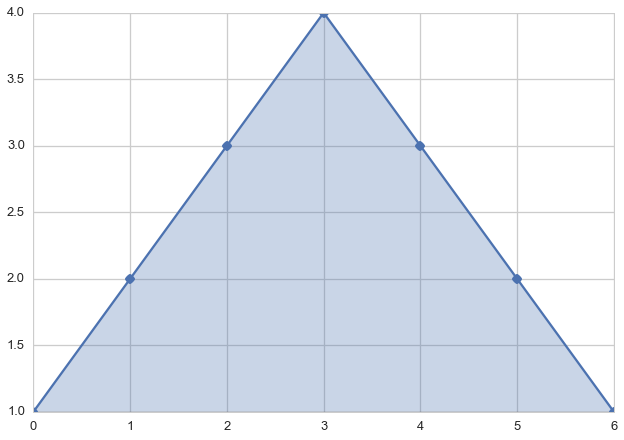

In [55]:
plt.figure()
plt.fill([1,2,3,4,3,2,1],alpha=0.3)
plt.plot([1,2,3,4,3,2,1],'-o')

In [56]:
import sys

In [57]:
for noiselevel in [2,4,6,8,10]:
    sys.stdout.write('%20f' % (1.0/noiselevel))
    sys.stdout.write('%20f' % (20*np.log10(1.0/noiselevel)))
    sys.stdout.write('\n')

            0.500000           -6.020600
            0.250000          -12.041200
            0.166667          -15.563025
            0.125000          -18.061800
            0.100000          -20.000000


In [58]:
for noiselevel in [2,4,6,8,10,100,1000,10000]:
    print('{0:3.5f} {1:3.4f}'.format(1.0/noiselevel, 20*np.log10(1.0/noiselevel)))

0.50000 -6.0206
0.25000 -12.0412
0.16667 -15.5630
0.12500 -18.0618
0.10000 -20.0000
0.01000 -40.0000
0.00100 -60.0000
0.00010 -80.0000


In [59]:
SNR = -60

In [60]:
10**(1/20*SNR)

0.001

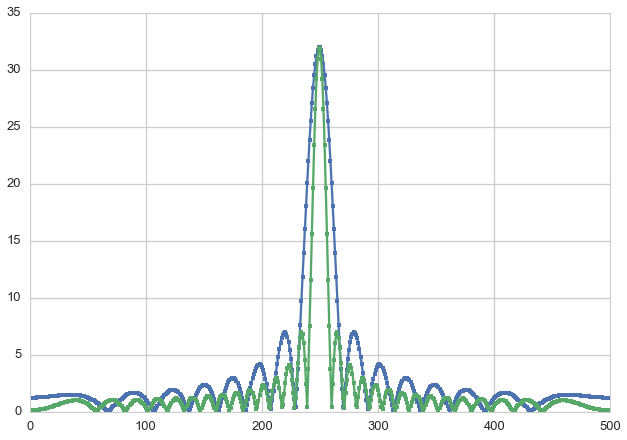

In [61]:
PA = PhasedArray(33, 18, 75)
PA.plot()
PA = PhasedArray(33, 18, 38.5)
PA.plot()

In [76]:
def researchC():
    C = CFDN(PA, S, 36, [-70*np.pi/180, 70*np.pi/180])
    plt.subplot(211)
    C.logfillacc()
    plt.ylim([-10,0])
    plt.xlim([-6,6])
    plt.title('Широкие лучи')
    ax = plt.gca()
    label = ax.set_xlabel('Азимут, град.')
    ax.xaxis.set_label_coords(1.07, -0.035)
    ax = plt.gca()
    label = ax.set_ylabel('Амплитуда, дБ',rotation='horizontal')
    ax.yaxis.set_label_coords(-0.025,1.05)
    plt.text(0,-11,'а)',fontsize=16)

In [77]:
def researchmyC(P):
    NC = NarrowCFDNmy(NPA, S, P, 0)
    plt.subplot(212)
    NC.logfillacc()
    plt.ylim([-10,0])
    #plt.xlim([-6,6])
    plt.title('Узкие лучи')
    ax = plt.gca()
    label = ax.set_xlabel('Азимут, град.')
    ax.xaxis.set_label_coords(1.07, -0.035)
    ax = plt.gca()
    label = ax.set_ylabel('Амплитуда, дБ',rotation='horizontal')
    ax.yaxis.set_label_coords(-0.025,1.05)
    plt.text(0,-11,'б)',fontsize=16)

/usr/lib/python3.4/site-packages/scipy/signal/windows.py:1207: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


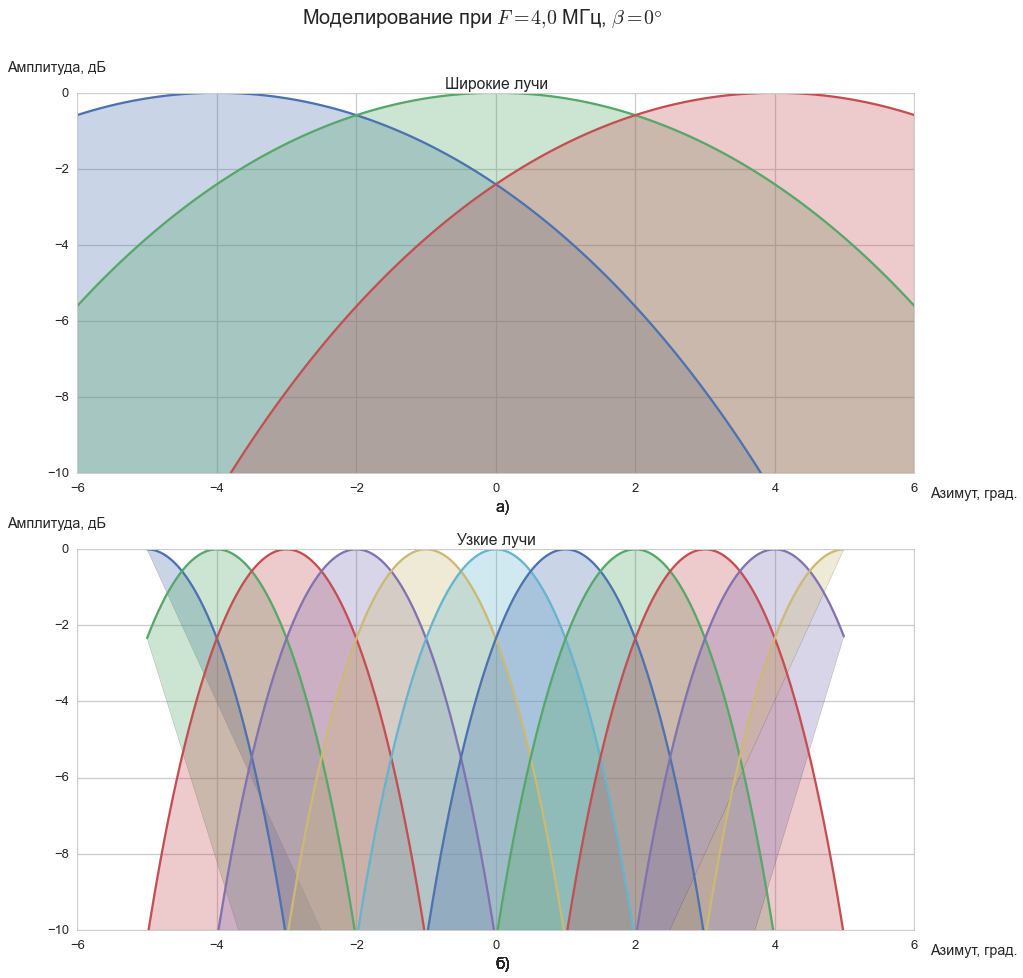

In [79]:
PA = PhasedArray(33, 18, 75.0)
NPA = PhasedArray(128, 18, 75.0)
P = 15
plt.figure(figsize=(15,15))
plt.suptitle(r"Моделирование при $F=4,0$ МГц, $\beta = 0 \degree$",fontsize=20)
for theta in range(-4,5,4):
    theta = theta*np.pi/180
    S = Signal(PA, theta) + Noise(PA, 10000.0)
    researchC()
for theta in range(-5,6):
    theta = theta*np.pi/180
    S = Signal(PA, theta)+Noise(PA, 10000.0)
    #S = Signal(PA, 28*np.pi/180)+Signal(PA, 32*np.pi/180)+Noise(PA, 1000.0)
    researchmyC(P)
plt.savefig('Моделирование при F=4,0 МГц, beta=0.png')

In [80]:
def researchC():
    C = CFDN(PA, S, 36, [-70*np.pi/180, 70*np.pi/180])
    plt.subplot(211)
    C.logfillacc()
    plt.ylim([-10,0])
    plt.xlim([50,60])
    plt.title('Широкие лучи')
    ax = plt.gca()
    label = ax.set_xlabel('Азимут, град.')
    ax.xaxis.set_label_coords(1.07, -0.025)
    ax = plt.gca()
    label = ax.set_ylabel('Амплитуда, дБ',rotation='horizontal')
    ax.yaxis.set_label_coords(-0.025,1.05)
    plt.text(55,-11,'а)',fontsize=16)

In [81]:
def researchmyC(P):
    NC = NarrowCFDNmy(NPA, S, P, 55)
    plt.subplot(212)
    NC.logfillacc()
    plt.ylim([-10,0])
    #plt.xlim([-6,6])
    plt.title('Узкие лучи')
    ax = plt.gca()
    label = ax.set_xlabel('Азимут, град.')
    ax.xaxis.set_label_coords(1.07, -0.025)
    ax = plt.gca()
    label = ax.set_ylabel('Амплитуда, дБ',rotation='horizontal')
    ax.yaxis.set_label_coords(-0.025,1.05)
    plt.text(55,-11,'б)',fontsize=16)

In [82]:
4*13

52

In [83]:
52+4

56

In [84]:
56+4

60

/usr/lib/python3.4/site-packages/scipy/signal/windows.py:1207: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


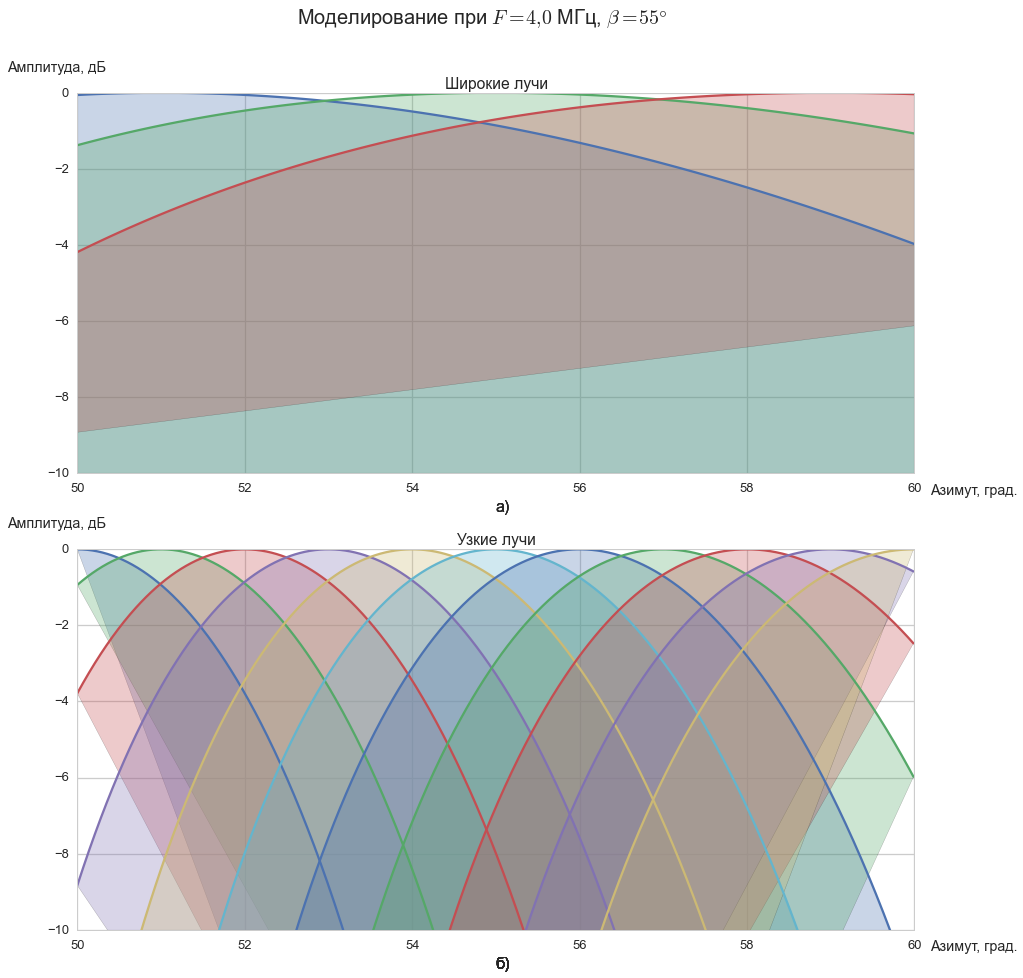

In [85]:
PA = PhasedArray(33, 18, 75.0)
NPA = PhasedArray(128, 18, 75.0)
P = 15
plt.figure(figsize=(15,15))
plt.suptitle(r"Моделирование при $F=4,0$ МГц, $\beta=55\degree$",fontsize=20)
for theta in range(51,60,4):
    theta = theta*np.pi/180
    S = Signal(PA, theta) + Noise(PA, 10000.0)
    researchC()
for theta in range(50,61):
    theta = theta*np.pi/180
    S = Signal(PA, theta)+Noise(PA, 10000.0)
    #S = Signal(PA, 28*np.pi/180)+Signal(PA, 32*np.pi/180)+Noise(PA, 1000.0)
    researchmyC(P)
plt.savefig('Моделирование при F=4,0 МГц, beta=55.png')

In [86]:
def researchC():
    C = CFDN(PA, S, 36, [-70*np.pi/180, 70*np.pi/180])
    plt.subplot(211)
    C.logfillacc()
    plt.ylim([-10,0])
    plt.xlim([-6,6])
    plt.title('Широкие лучи')
    ax = plt.gca()
    label = ax.set_xlabel('Азимут, град.')
    ax.xaxis.set_label_coords(1.07, -0.025)
    ax = plt.gca()
    label = ax.set_ylabel('Амплитуда, дБ',rotation='horizontal')
    ax.yaxis.set_label_coords(-0.025,1.05)
    plt.text(0,-11,'а)',fontsize=16)

In [87]:
def researchmyC(P):
    NC = NarrowCFDNmy(NPA, S, P, 0)
    plt.subplot(212)
    NC.logfillacc()
    plt.ylim([-10,0])
    #plt.xlim([-6,6])
    plt.title('Узкие лучи')
    ax = plt.gca()
    label = ax.set_xlabel('Азимут, град.')
    ax.xaxis.set_label_coords(1.07, -0.025)
    ax = plt.gca()
    label = ax.set_ylabel('Амплитуда, дБ',rotation='horizontal')
    ax.yaxis.set_label_coords(-0.025,1.05)
    plt.text(0,-11,'б)',fontsize=16)

/usr/lib/python3.4/site-packages/scipy/signal/windows.py:1207: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


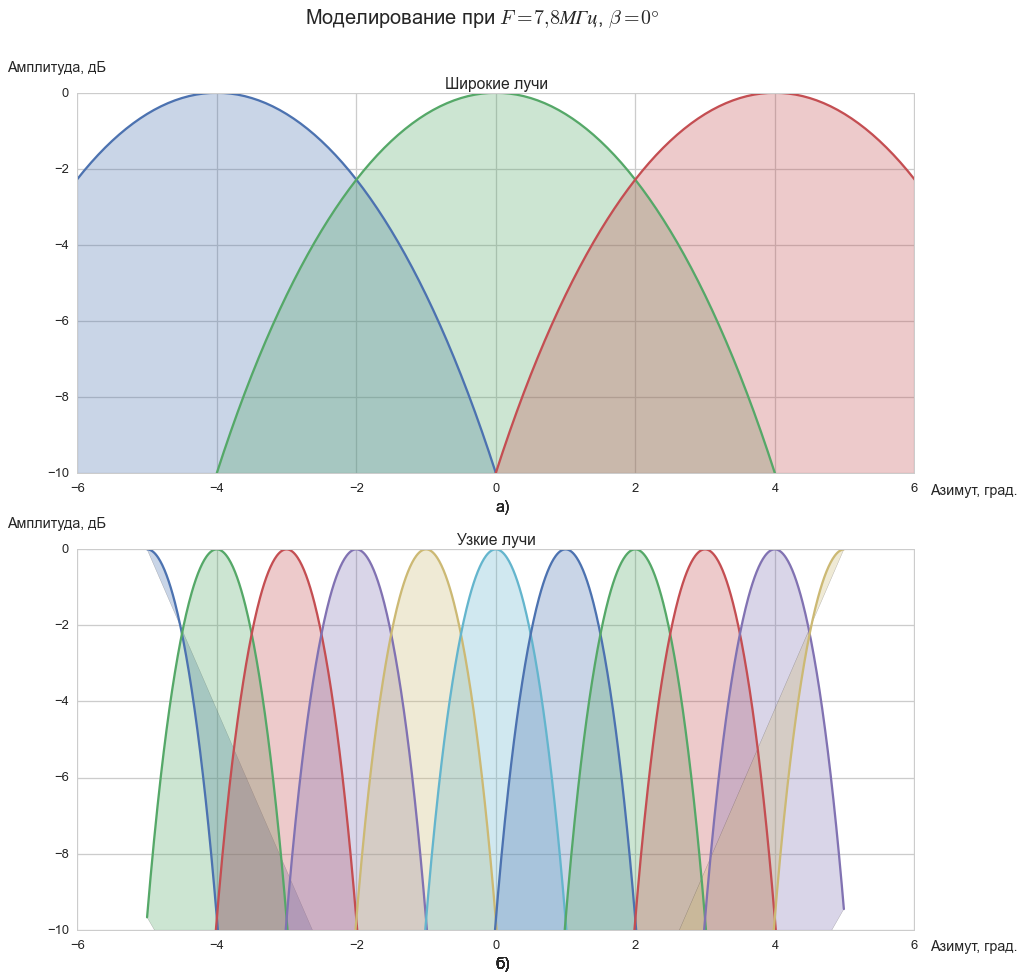

In [88]:
PA = PhasedArray(33, 18, 38.46)
NPA = PhasedArray(128, 18, 38.46)
P = 15
plt.figure(figsize=(15,15))
plt.suptitle(r"Моделирование при $F=7,8 МГц$, $\beta=0\degree$",fontsize=20)
for theta in range(-4,5,4):
    theta = theta*np.pi/180
    S = Signal(PA, theta) + Noise(PA, 10000.0)
    researchC()
for theta in range(-5,6):
    theta = theta*np.pi/180
    S = Signal(PA, theta)+Noise(PA, 10000.0)
    #S = Signal(PA, 28*np.pi/180)+Signal(PA, 32*np.pi/180)+Noise(PA, 1000.0)
    researchmyC(P)
plt.savefig('Моделирование при F=7,8 МГц, beta=0.png')

In [89]:
def researchC():
    C = CFDN(PA, S, 36, [-70*np.pi/180, 70*np.pi/180])
    plt.subplot(211)
    C.logfillacc()
    plt.ylim([-10,0])
    plt.xlim([50,60])
    plt.title('Широкие лучи')
    ax = plt.gca()
    label = ax.set_xlabel('Азимут, град.')
    ax.xaxis.set_label_coords(1.07, -0.025)
    ax = plt.gca()
    label = ax.set_ylabel('Амплитуда, дБ',rotation='horizontal')
    ax.yaxis.set_label_coords(-0.025,1.05)
    plt.text(55,-11,'а)',fontsize=16)

In [90]:
def researchmyC(P):
    NC = NarrowCFDNmy(NPA, S, P, 55)
    plt.subplot(212)
    NC.logfillacc()
    plt.ylim([-10,0])
    #plt.xlim([-6,6])
    plt.title('Узкие лучи')
    ax = plt.gca()
    label = ax.set_xlabel('Азимут, град.')
    ax.xaxis.set_label_coords(1.07, -0.025)
    ax = plt.gca()
    label = ax.set_ylabel('Амплитуда, дБ',rotation='horizontal')
    ax.yaxis.set_label_coords(-0.025,1.05)
    plt.text(55,-11,'б)',fontsize=16)

/usr/lib/python3.4/site-packages/scipy/signal/windows.py:1207: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


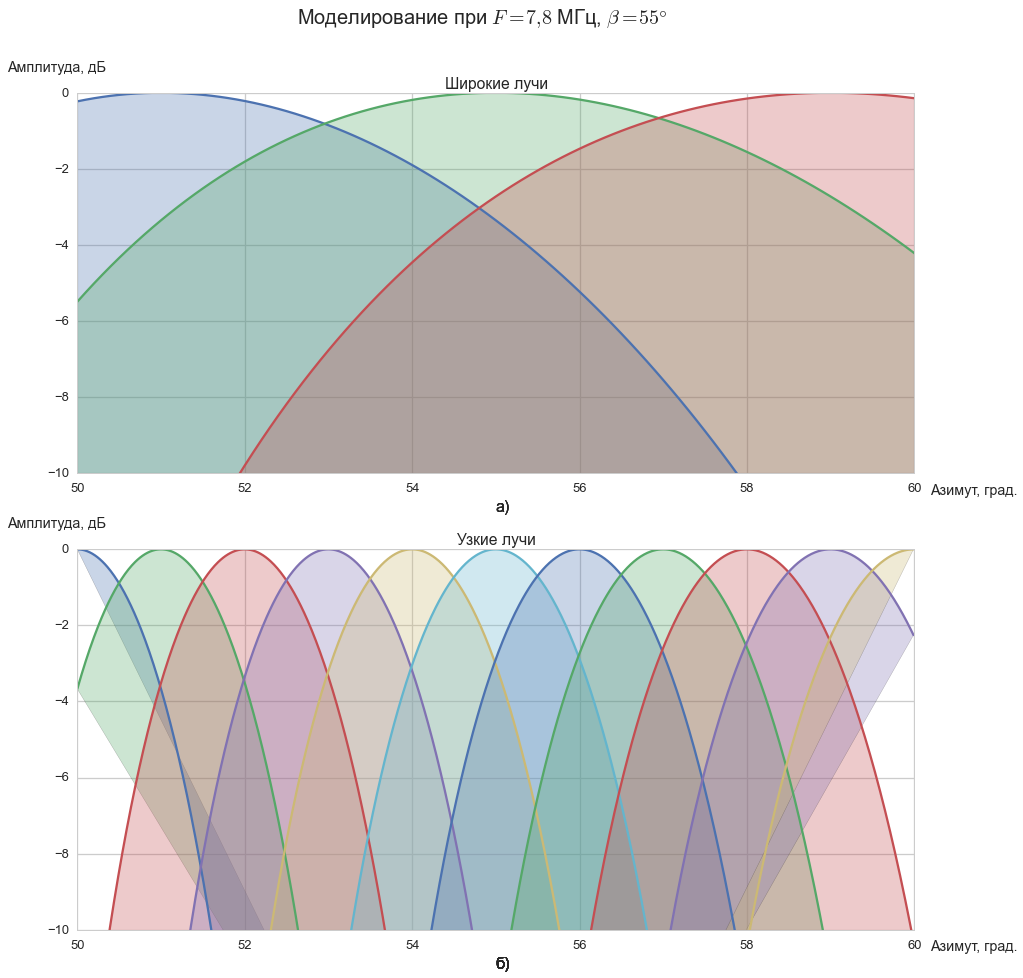

In [91]:
PA = PhasedArray(33, 18, 38.46)
NPA = PhasedArray(128, 18, 38.46)
P = 15
plt.figure(figsize=(15,15))
plt.suptitle(r"Моделирование при $F=7,8$ МГц, $\beta=55\degree$",fontsize=20)
for theta in range(51,60,4):
    theta = theta*np.pi/180
    S = Signal(PA, theta) + Noise(PA, 10000.0)
    researchC()
for theta in range(50,61):
    theta = theta*np.pi/180
    S = Signal(PA, theta)+Noise(PA, 10000.0)
    #S = Signal(PA, 28*np.pi/180)+Signal(PA, 32*np.pi/180)+Noise(PA, 1000.0)
    researchmyC(P)
plt.savefig('Моделирование при F=7,8 МГц, beta=55.png')

In [92]:
import copy

/usr/lib/python3.4/site-packages/scipy/signal/windows.py:1207: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


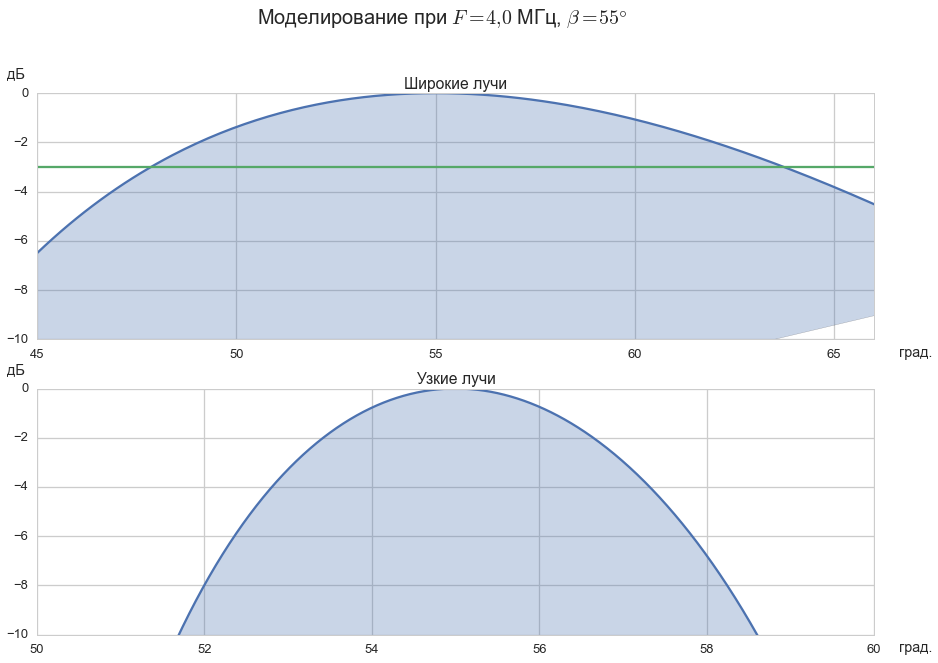

In [93]:
PA = PhasedArray(33, 18, 75.0)
NPA = PhasedArray(128, 18, 75.0)
P = 15
plt.figure(figsize=(15,15))
plt.suptitle(r"Моделирование при $F=4,0$ МГц, $\beta=55\degree$",fontsize=20)
theta = 55
theta1 = copy.copy(theta)
theta = theta*np.pi/180
S = Signal(PA, theta) + Noise(PA, 10000.0)
C = CFDN(PA, S, 36, [-70*np.pi/180, 70*np.pi/180])
plt.subplot(311)
C.logfillacc()
plt.ylim([-10,0])
plt.xlim([theta1-10,theta1+11])
plt.plot([theta1-10,theta1+11],[-3,-3])
plt.title('Широкие лучи')
ax = plt.gca()
label = ax.set_xlabel('град.')
ax.xaxis.set_label_coords(1.05, -0.025)
ax = plt.gca()
label = ax.set_ylabel('дБ',rotation='horizontal')
ax.yaxis.set_label_coords(-0.025,1.05)
P = 15
#theta = theta*np.pi/180
S = Signal(PA, theta)+Noise(PA, 10000.0)
#S = Signal(PA, 28*np.pi/180)+Signal(PA, 32*np.pi/180)+Noise(PA, 1000.0)
NC = NarrowCFDNmy(NPA, S, P, theta1)
plt.subplot(312)
NC.logfillacc()
plt.ylim([-10,0])
#plt.xlim([-6,6])
plt.title('Узкие лучи')
ax = plt.gca()
label = ax.set_xlabel('град.')
ax.xaxis.set_label_coords(1.05, -0.025)
ax = plt.gca()
label = ax.set_ylabel('дБ',rotation='horizontal')
ax.yaxis.set_label_coords(-0.025,1.05)

In [94]:
def finddist(C,dist):
    logdiag = 20*np.log10(np.abs(C.accuratediag)/np.max(np.abs(C.accuratediag)))
    a = np.where(logdiag >= -3.0)[0][0]
    b = np.where(logdiag >= -3.0)[0][-1]
    
    return (a, b), (b-a)*dist

In [95]:
ans1 = finddist(C,0.1); ans1

((1179, 1337), 15.800000000000001)

In [96]:
dist4055 = ans1[1]

In [97]:
ans2 = finddist(NC,0.01); ans2

((309, 701), 3.9199999999999999)

In [98]:
dist4055n = ans2[1]

/usr/lib/python3.4/site-packages/scipy/signal/windows.py:1207: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


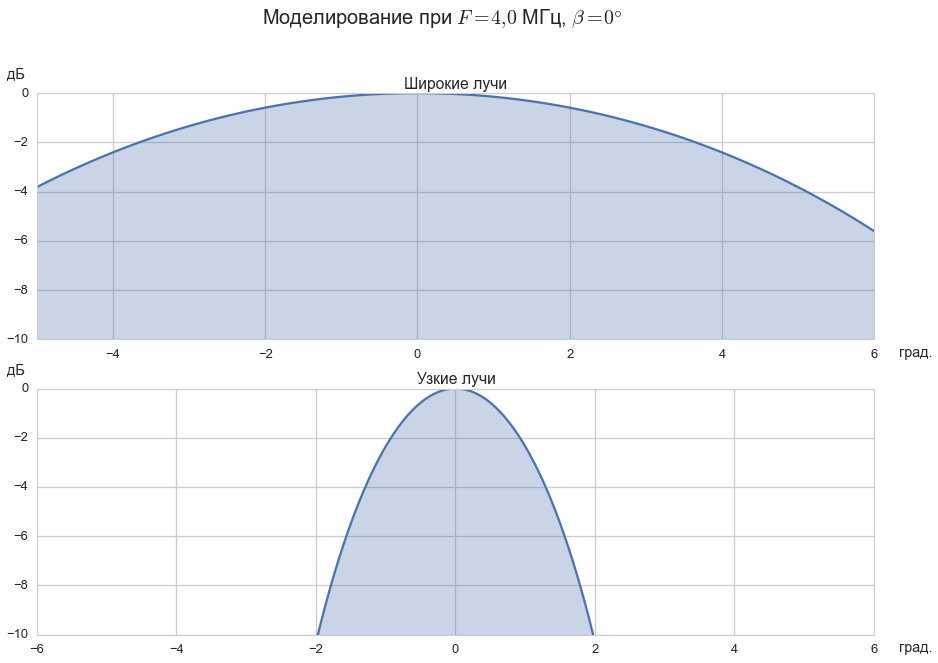

In [99]:
PA = PhasedArray(33, 18, 75.0)
NPA = PhasedArray(128, 18, 75.0)
P = 15
plt.figure(figsize=(15,15))
plt.suptitle(r"Моделирование при $F=4,0$ МГц, $\beta=0\degree$",fontsize=20)
theta = 0
theta1 = copy.copy(theta)
theta = theta*np.pi/180
S = Signal(PA, theta) + Noise(PA, 10000.0)
C = CFDN(PA, S, 36, [-70*np.pi/180, 70*np.pi/180])
plt.subplot(311)
C.logfillacc()
plt.ylim([-10,0])
plt.xlim([theta1-5,theta1+6])
plt.title('Широкие лучи')
ax = plt.gca()
label = ax.set_xlabel('град.')
ax.xaxis.set_label_coords(1.05, -0.025)
ax = plt.gca()
label = ax.set_ylabel('дБ',rotation='horizontal')
ax.yaxis.set_label_coords(-0.025,1.05)
P = 15
#theta = theta*np.pi/180
S = Signal(PA, theta)+Noise(PA, 10000.0)
#S = Signal(PA, 28*np.pi/180)+Signal(PA, 32*np.pi/180)+Noise(PA, 1000.0)
NC = NarrowCFDNmy(NPA, S, P, theta1)
plt.subplot(312)
NC.logfillacc()
plt.ylim([-10,0])
#plt.xlim([-6,6])
plt.title('Узкие лучи')
ax = plt.gca()
label = ax.set_xlabel('град.')
ax.xaxis.set_label_coords(1.05, -0.025)
ax = plt.gca()
label = ax.set_ylabel('дБ',rotation='horizontal')
ax.yaxis.set_label_coords(-0.025,1.05)

In [116]:
N = 28; np.linspace(-55,55,N)[-1]-np.linspace(-55,55,N)[-2]

4.074074074074062

In [118]:
np.linspace(-55,55,N+1)

array([-55.        , -51.07142857, -47.14285714, -43.21428571,
       -39.28571429, -35.35714286, -31.42857143, -27.5       ,
       -23.57142857, -19.64285714, -15.71428571, -11.78571429,
        -7.85714286,  -3.92857143,   0.        ,   3.92857143,
         7.85714286,  11.78571429,  15.71428571,  19.64285714,
        23.57142857,  27.5       ,  31.42857143,  35.35714286,
        39.28571429,  43.21428571,  47.14285714,  51.07142857,  55.        ])

In [100]:
ans1 = finddist(C,0.1); ans1

((656, 744), 8.8000000000000007)

In [101]:
dist400 = ans1[1]

In [102]:
ans2 = finddist(NC,0.01); ans2

((388, 612), 2.2400000000000002)

In [81]:
dist400n = ans2[1]

In [82]:
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

In [83]:
table1 = ListTable()
table1.append(['','F=4.0 МГц',''])
table1.append(['','0 град.', '55 град.'])
x = dist400
y = dist4055
table1.append(['Широкие лучи',x, y])
x = dist400n
y = dist4055n
table1.append(['Узкие лучи',x, y])

In [84]:
table1

[['', 'F=4.0 МГц', ''],
 ['', '0 град.', '55 град.'],
 ['Широкие лучи', 8.8000000000000007, 15.800000000000001],
 ['Узкие лучи', 2.2400000000000002, 3.9199999999999999]]

/usr/lib/python3.4/site-packages/scipy/signal/windows.py:1207: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


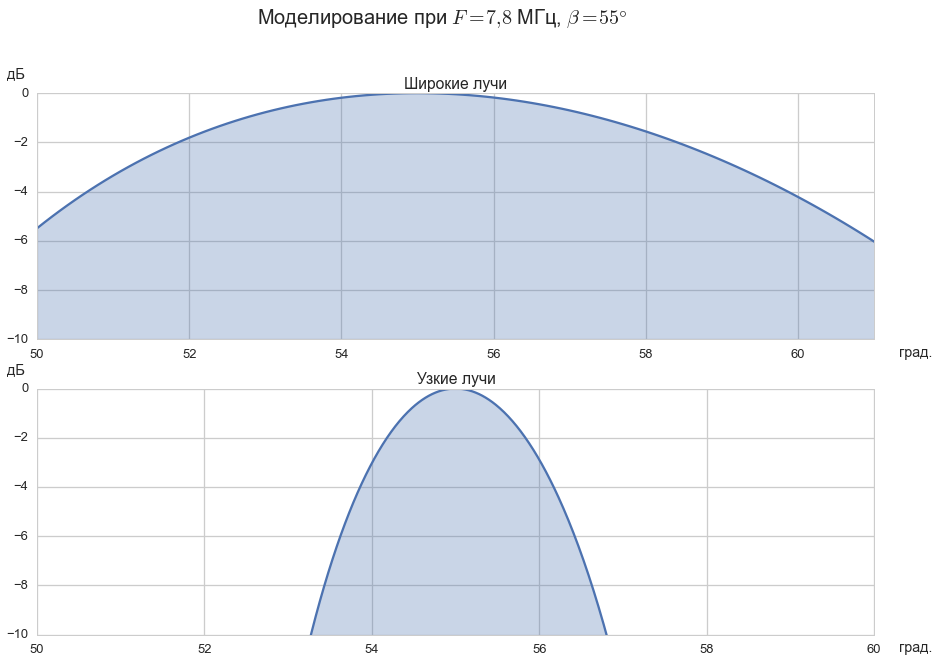

In [85]:
PA = PhasedArray(33, 18, 38.46)
NPA = PhasedArray(128, 18, 38.46)
P = 15
plt.figure(figsize=(15,15))
plt.suptitle(r"Моделирование при $F=7,8$ МГц, $\beta=55\degree$",fontsize=20)
theta = 55
theta1 = copy.copy(theta)
theta = theta*np.pi/180
S = Signal(PA, theta) + Noise(PA, 10000.0)
C = CFDN(PA, S, 29, [-70*np.pi/180, 70*np.pi/180])
plt.subplot(311)
C.logfillacc()
plt.ylim([-10,0])
plt.xlim([theta1-5,theta1+6])
plt.title('Широкие лучи')
ax = plt.gca()
label = ax.set_xlabel('град.')
ax.xaxis.set_label_coords(1.05, -0.025)
ax = plt.gca()
label = ax.set_ylabel('дБ',rotation='horizontal')
ax.yaxis.set_label_coords(-0.025,1.05)
P = 15
#theta = theta*np.pi/180
S = Signal(PA, theta)+Noise(PA, 10000.0)
#S = Signal(PA, 28*np.pi/180)+Signal(PA, 32*np.pi/180)+Noise(PA, 1000.0)
NC = NarrowCFDNmy(NPA, S, P, theta1)
plt.subplot(312)
NC.logfillacc()
plt.ylim([-10,0])
#plt.xlim([-6,6])
plt.title('Узкие лучи')
ax = plt.gca()
label = ax.set_xlabel('град.')
ax.xaxis.set_label_coords(1.05, -0.025)
ax = plt.gca()
label = ax.set_ylabel('дБ',rotation='horizontal')
ax.yaxis.set_label_coords(-0.025,1.05)

In [86]:
ans1 = finddist(C,0.1)

In [87]:
dist7855 = ans1[1]

In [88]:
ans2 = finddist(NC,0.01)

In [89]:
dist7855n = ans2[1]

/usr/lib/python3.4/site-packages/scipy/signal/windows.py:1207: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


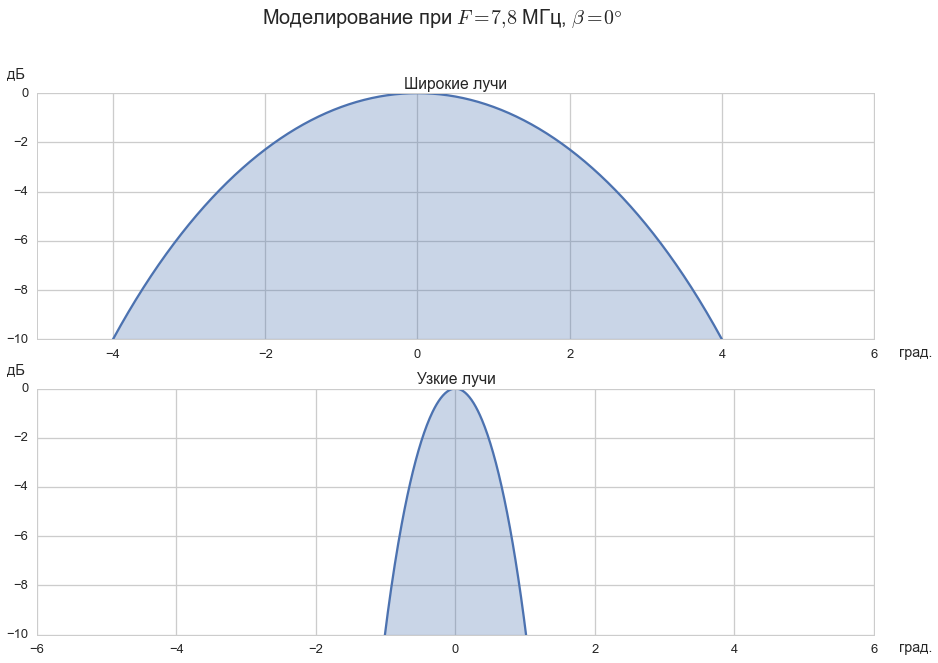

In [90]:
PA = PhasedArray(33, 18, 38.46)
NPA = PhasedArray(128, 18, 38.46)
P = 15
plt.figure(figsize=(15,15))
plt.suptitle(r"Моделирование при $F=7,8$ МГц, $\beta=0\degree$",fontsize=20)
theta = 0
theta1 = copy.copy(theta)
theta = theta*np.pi/180
S = Signal(PA, theta) + Noise(PA, 10000.0)
C = CFDN(PA, S, 29, [-70*np.pi/180, 70*np.pi/180])
plt.subplot(311)
C.logfillacc()
plt.ylim([-10,0])
plt.xlim([theta1-5,theta1+6])
plt.title('Широкие лучи')
ax = plt.gca()
label = ax.set_xlabel('град.')
ax.xaxis.set_label_coords(1.05, -0.025)
ax = plt.gca()
label = ax.set_ylabel('дБ',rotation='horizontal')
ax.yaxis.set_label_coords(-0.025,1.05)
P = 15
#theta = theta*np.pi/180
S = Signal(PA, theta)+Noise(PA, 10000.0)
#S = Signal(PA, 28*np.pi/180)+Signal(PA, 32*np.pi/180)+Noise(PA, 1000.0)
NC = NarrowCFDNmy(NPA, S, P, theta1)
plt.subplot(312)
NC.logfillacc()
plt.ylim([-10,0])
#plt.xlim([-6,6])
plt.title('Узкие лучи')
ax = plt.gca()
label = ax.set_xlabel('град.')
ax.xaxis.set_label_coords(1.05, -0.025)
ax = plt.gca()
label = ax.set_ylabel('дБ',rotation='horizontal')
ax.yaxis.set_label_coords(-0.025,1.05)

In [91]:
ans1 = finddist(C,0.1)
dist780 = ans1[1]
ans2 = finddist(NC,0.01)
dist780n = ans2[1]

In [92]:
table2 = ListTable()
table2.append(['','F=7.8 МГц',''])
table2.append(['','0 град.', '55 град.'])
x = dist780
y = dist7855
table2.append(['Широкие лучи',x, y])
x = np.round(dist780n,decimals=3)
y = dist7855n
table2.append(['Узкие лучи',x, y])

In [93]:
table1

[['', 'F=4.0 МГц', ''],
 ['', '0 град.', '55 град.'],
 ['Широкие лучи', 8.8000000000000007, 15.800000000000001],
 ['Узкие лучи', 2.2400000000000002, 3.9199999999999999]]

In [94]:
table2

[['', 'F=7.8 МГц', ''],
 ['', '0 град.', '55 град.'],
 ['Широкие лучи', 4.4000000000000004, 7.9000000000000004],
 ['Узкие лучи', 1.1399999999999999, 2.0]]

In [95]:
2.24/np.cos(55*np.pi/180)

3.9053208221912596

In [96]:
8.8/np.cos(55*np.pi/180)

15.342331801465662

In [97]:
4.4/np.cos(55*np.pi/180)

7.6711659007328308

In [98]:
1.14/np.cos(55*np.pi/180)

1.9875293470080513